In [1]:
import os
from pathlib import Path
import pandas as pd

In [63]:
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))

IndexedPath  = str(DirPpath.absolute()) + "\IndexedDataV1Tf.csv"  

In [64]:
IndexedData = pd.read_csv(IndexedPath, index_col=0)

In [65]:
IndexedData.head()

0         1         2         3         4         5         6  \
0 -0.272695  0.958408 -1.359184  0.826543 -0.452139 -1.354856 -0.225305   
1 -0.223349 -0.022435 -0.047732  0.492483 -0.410774 -0.231073  0.526124   
2 -0.050902  0.032003  0.086632  0.791165 -0.676106 -0.011618  0.621624   
3 -0.113013  0.289511  0.248155  0.779567 -0.247714 -0.319477  0.590456   
4 -0.271567 -0.249069 -0.036182  0.024828  0.224710  0.208741  0.398377   

          7         8         9  ...       290       291       292       293  \
0 -1.095456 -1.038892 -0.195101  ... -0.902075  1.631705 -0.323267  1.699850   
1 -0.501687  0.643666  0.084416  ... -0.664830  0.629641 -0.442693  0.209102   
2  0.046936  0.401462  0.202116  ... -0.528863  0.312693  0.107882  0.115561   
3 -0.816826  0.582444  0.410675  ... -0.915021 -0.040667 -0.155659 -0.021191   
4 -0.545897  0.587030  0.074211  ... -0.167903 -0.120062 -0.179502  0.407137   

        294       295       296       297       298       299  
0  0.328672 -0.734264 -1.969621 -0.248907 -1.485645  1.479979  
1 -0.149562 -0.021167 -0.088460 -0.108419  0.037818 -0.060396  
2 -0.181723  0.286701  0.219481 -0.219200  0.135525  0.237289  
3  0.142904  0.479077 -0.243850 -0.304395  0.407043 -0.186317  
4 -0.224319  0.061888  0.108300  0.291363 -0.076200 -0.100306  

[5 rows x 300 columns]

In [66]:
# Load the Topic column from the preprocessed data
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))
PreprocessedPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"  
Topics = pd.read_csv(PreprocessedPath, index_col=0)

IndexedData["Topic"] = Topics["Topic"].values # Adding a Topic column to the IndexedData dataframe

## Visualization - t-SNE

Rem: PCA = uneffective, only 30% of explained variance with the 2 first components

In [67]:
from sklearn.manifold import TSNE

In [68]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_data = scale.fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

In [158]:
results = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

In [160]:
# Building a new df for better visualization of t-SNE results
df = pd.DataFrame()
df["Topic"] = IndexedData["Topic"].values
df["Y1"] = results[:,0]
df["Y2"] = results[:,1]

Special visual for pres

In [161]:
df[df["Topic"] == 14]

Topic         Y1         Y2
57      14 -16.496891 -11.866104
149     14 -12.228094 -11.138028
150     14 -11.496749 -12.385746
151     14 -14.201534 -10.840430
152     14 -15.115471  -4.281381
153     14  15.699741  -1.848092
155     14   1.415722  -3.890324
156     14 -16.165222 -11.724260

In [ ]:
#153
# 57, 149, 150, 151, 152, 156

In [162]:
from wordcloud import WordCloud # For plotting wordclouds

In [164]:
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))
PledgesCsvPath = str(DirPpath.absolute()) + "\PreprocessedData.csv" 

print("The current location of PreprocessedData.csv is: ", PledgesCsvPath)

PledgesDf = pd.read_csv(PledgesCsvPath, index_col=0) # Loading the preprocessed pledges into a dataframe

The current location of PreprocessedData.csv is:  c:\Users\ecaudron001\Documents\GitHub\semic_pledges\PreprocessedData.csv


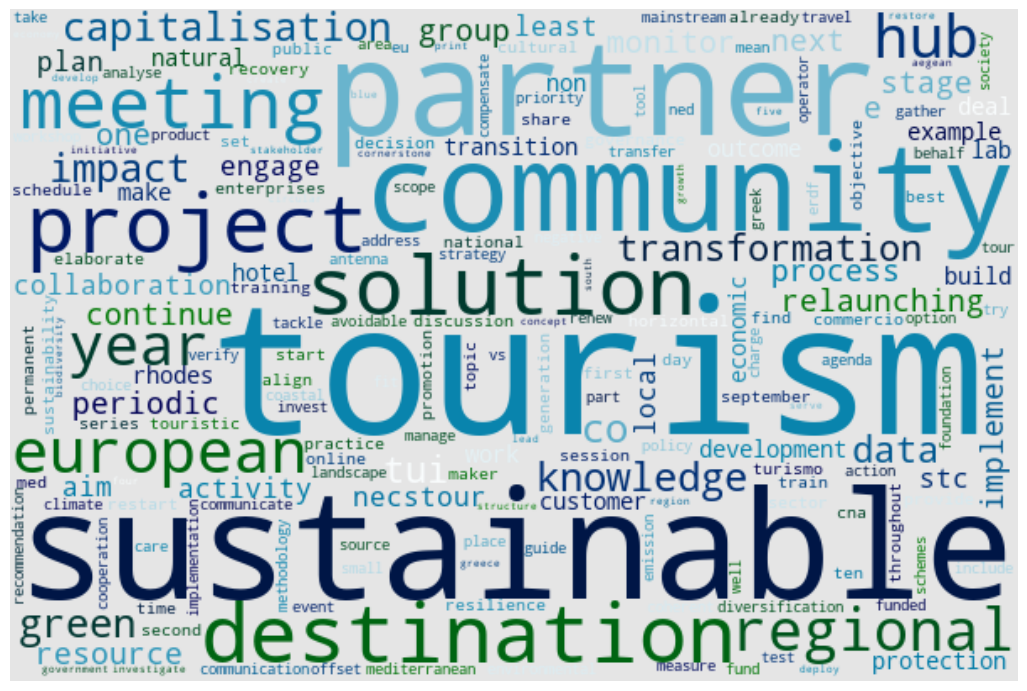

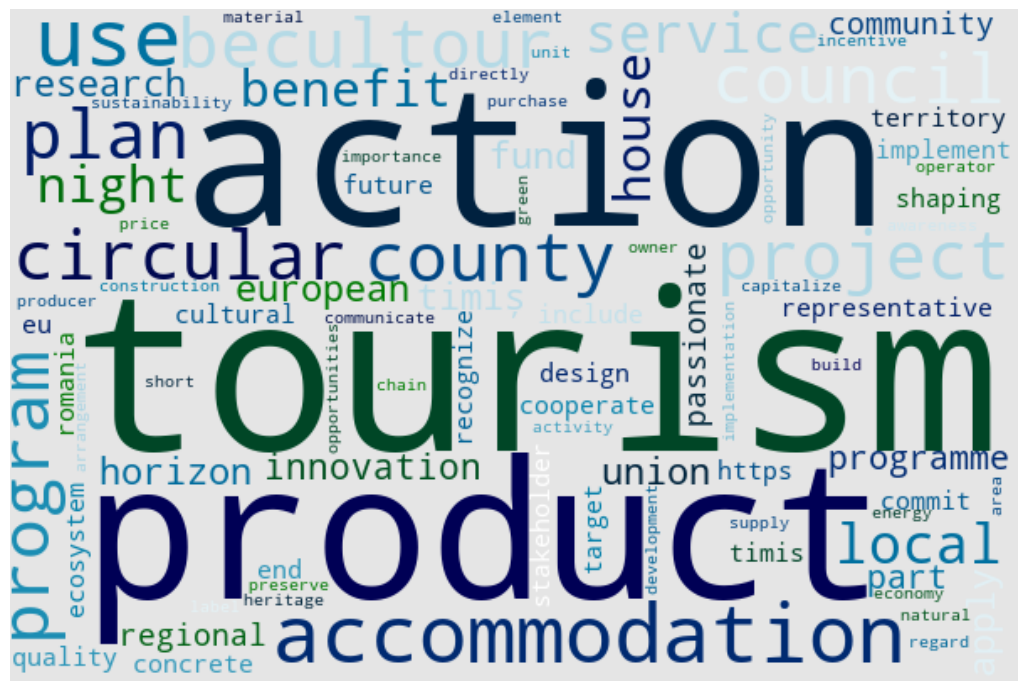

In [175]:
liste = [57, 149, 150, 151, 152, 156]
cluster = PledgesDf['PreProcessedText'][PledgesDf['PreProcessedText'].index.isin(liste)]
outlier = PledgesDf['PreProcessedText'][153]


cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5").generate(cluster.str.cat(sep=' '))
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

cloud=WordCloud(colormap="ocean_r",width=600,height=400, background_color="#e5e5e5").generate(outlier)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')
plt.show()

Global

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


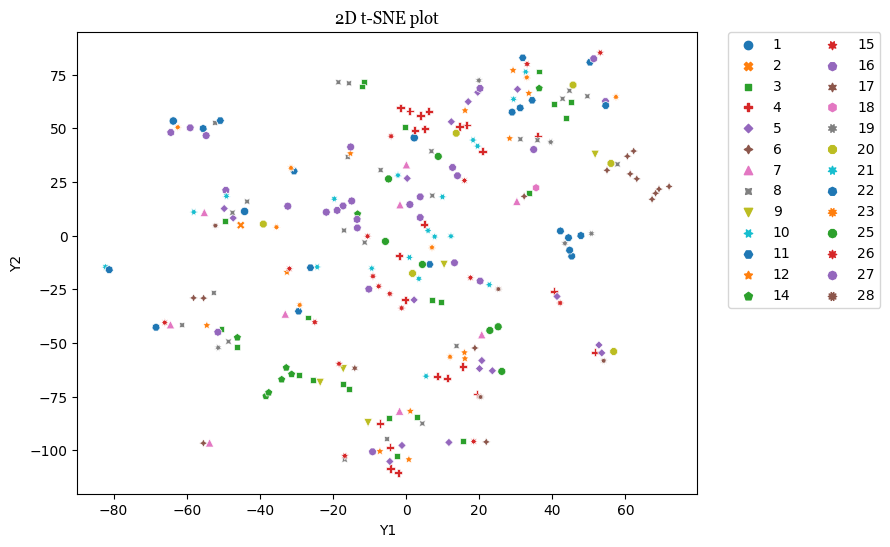

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


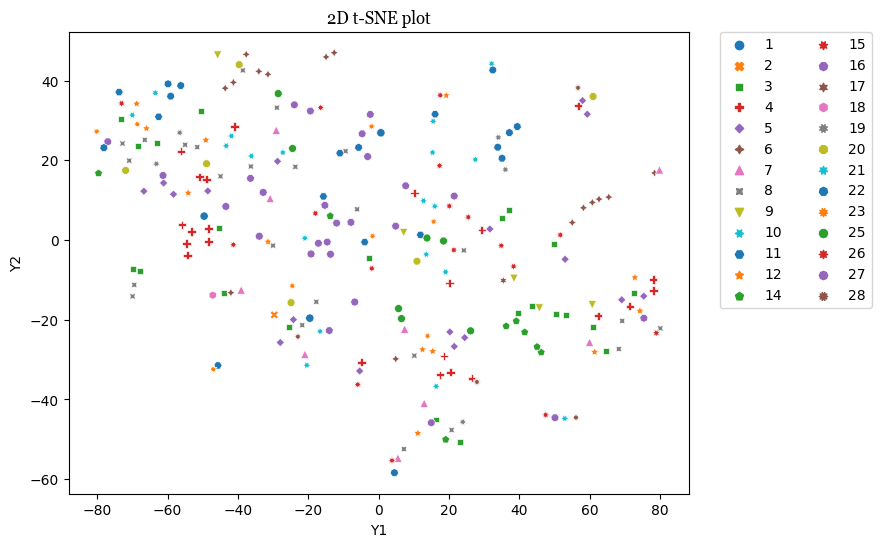

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


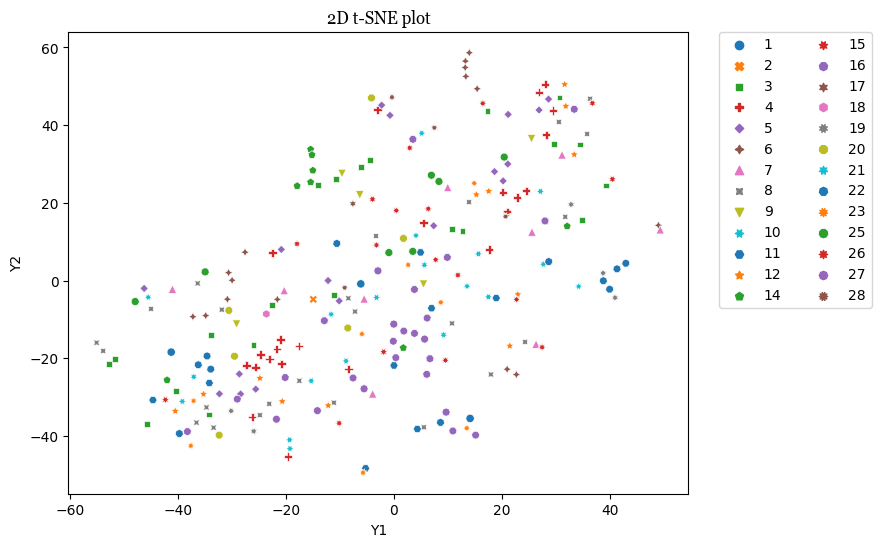

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


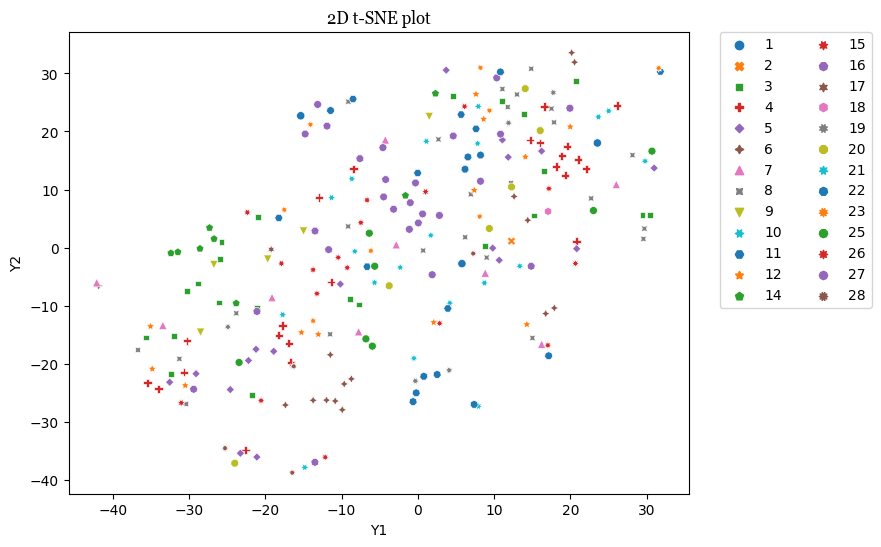

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


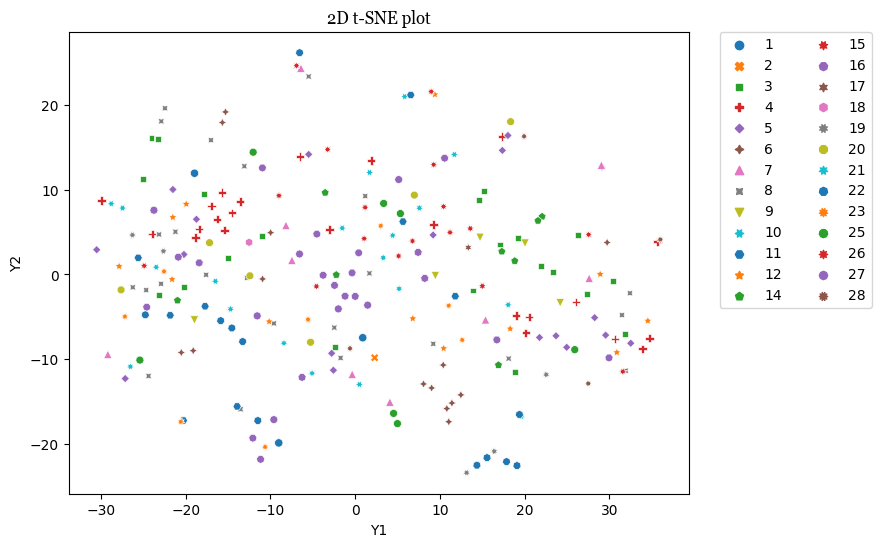

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


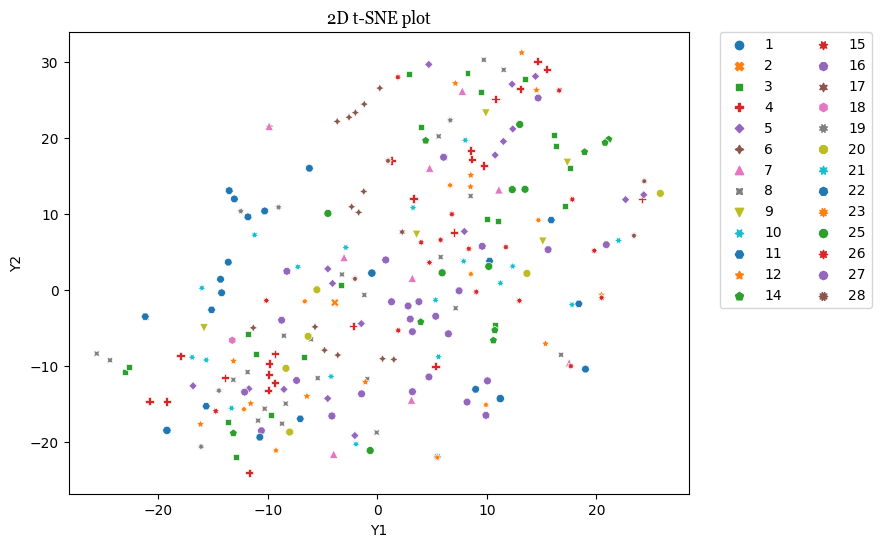

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


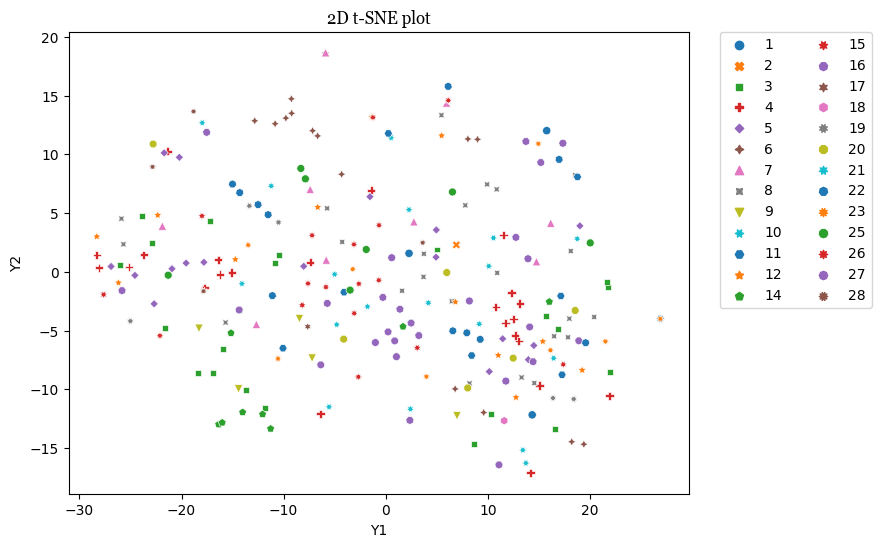

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


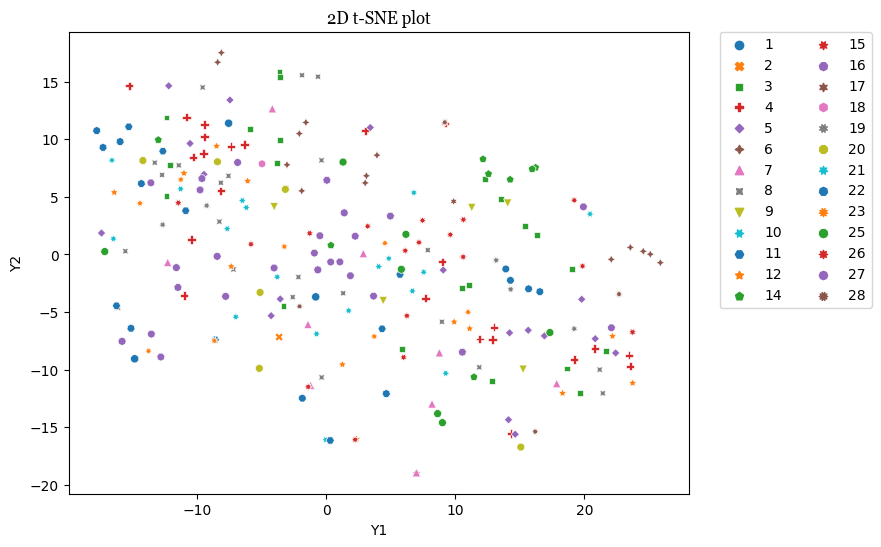

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


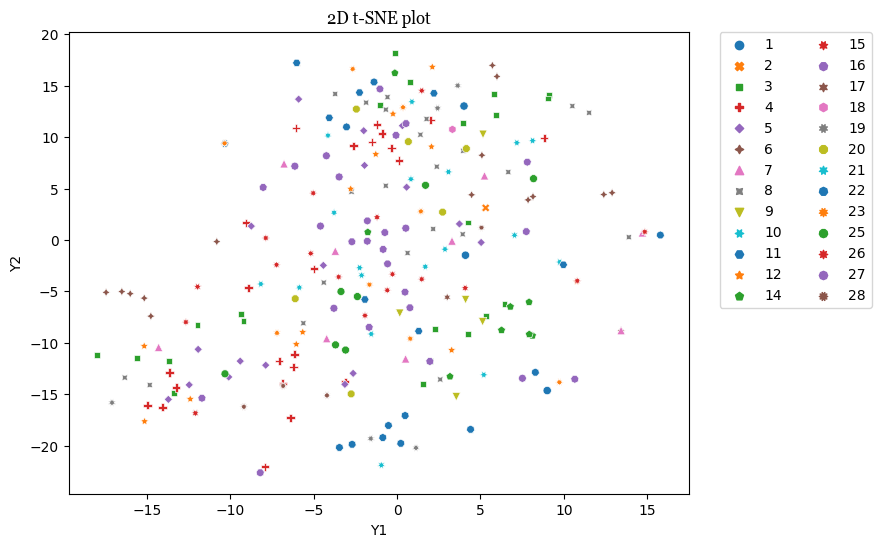

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


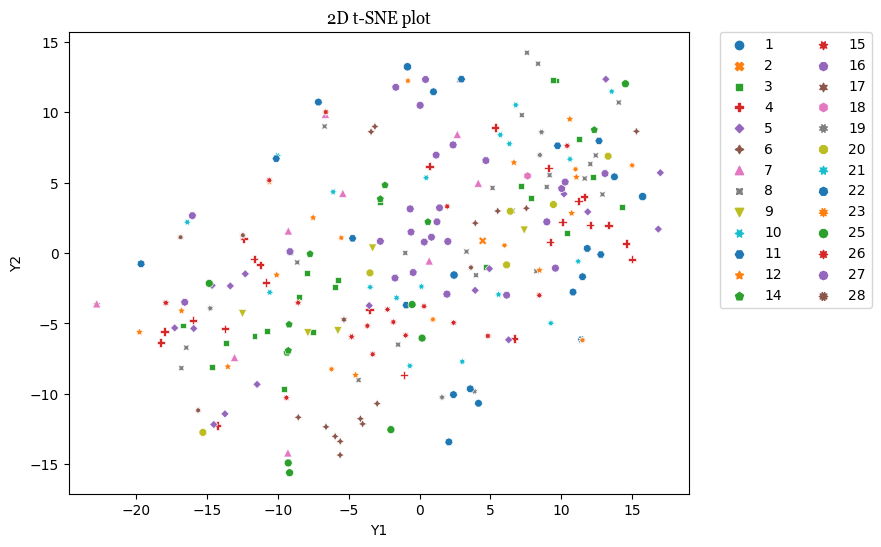

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


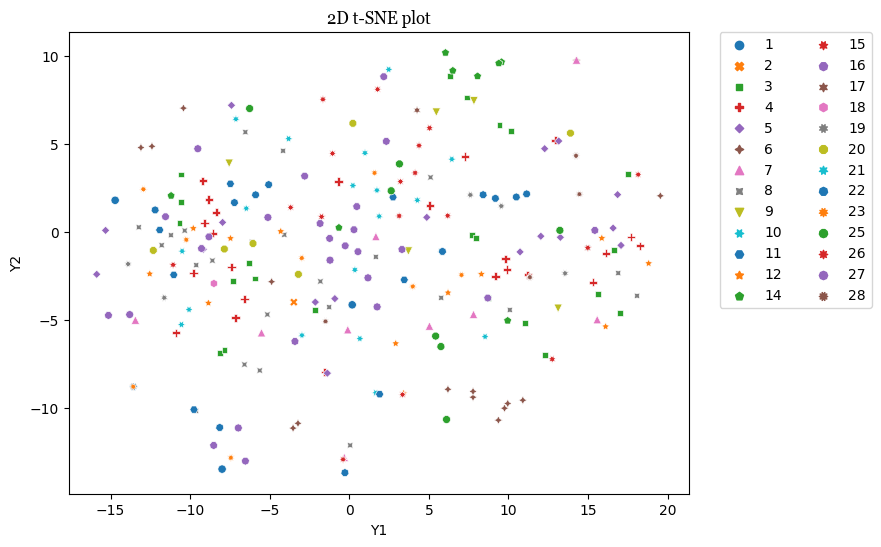

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


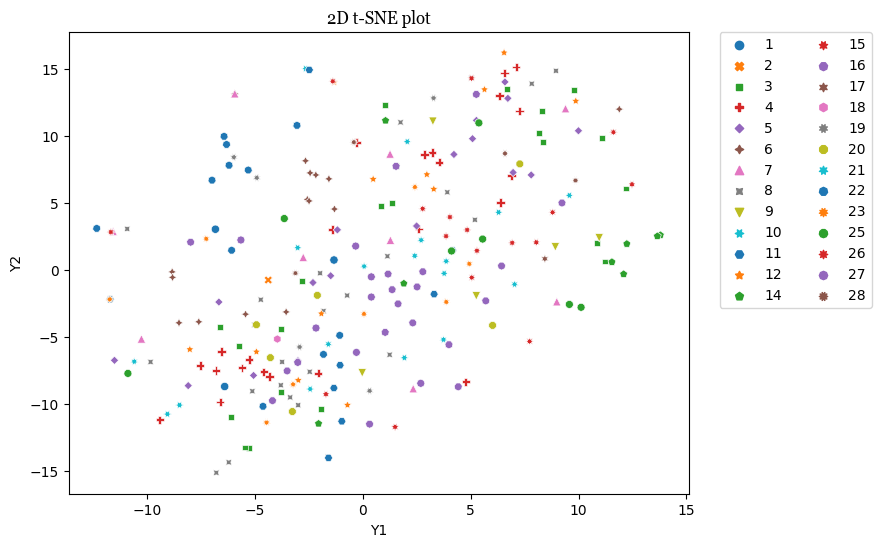

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


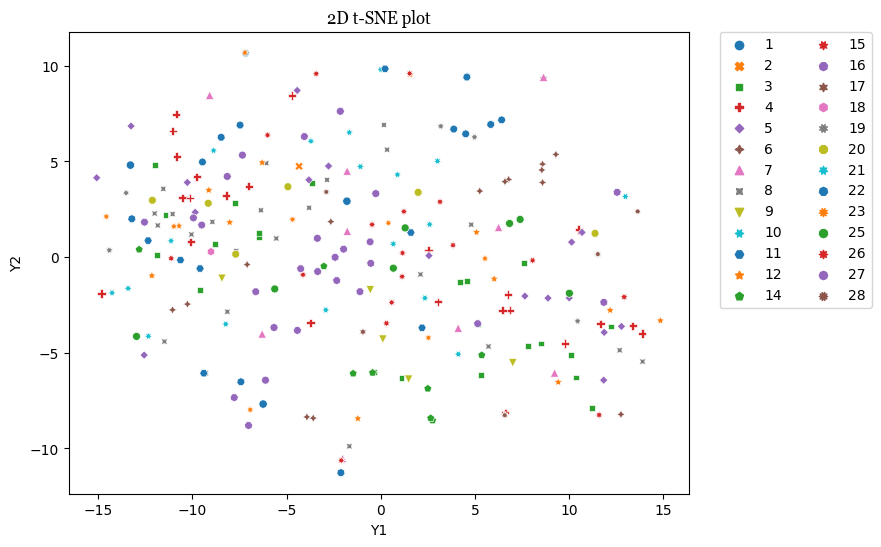

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


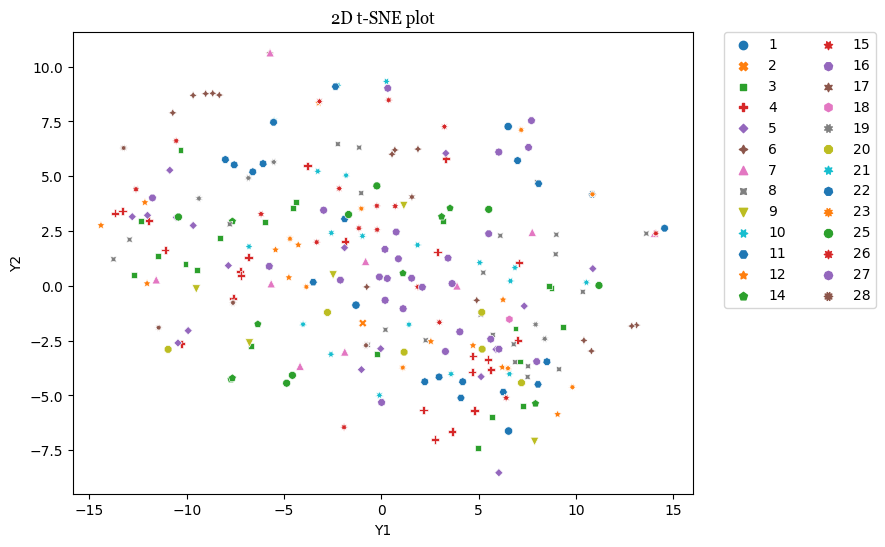

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


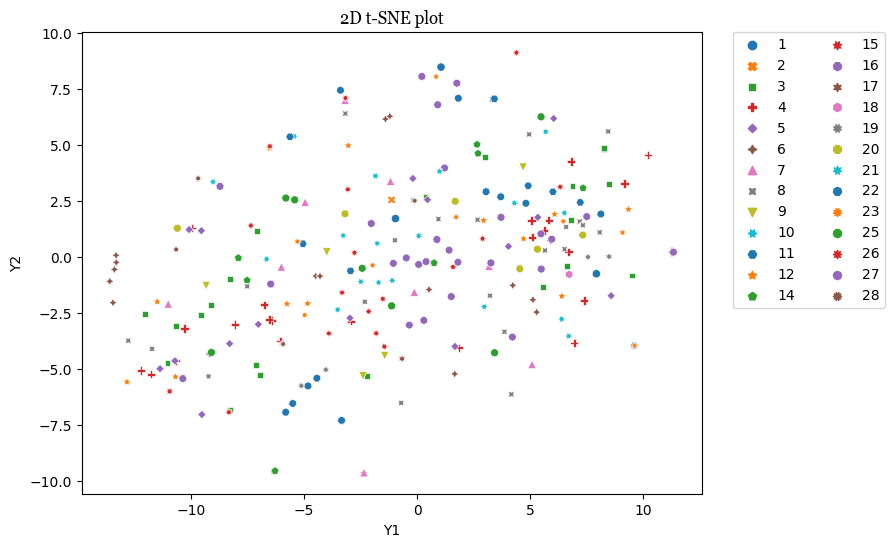

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


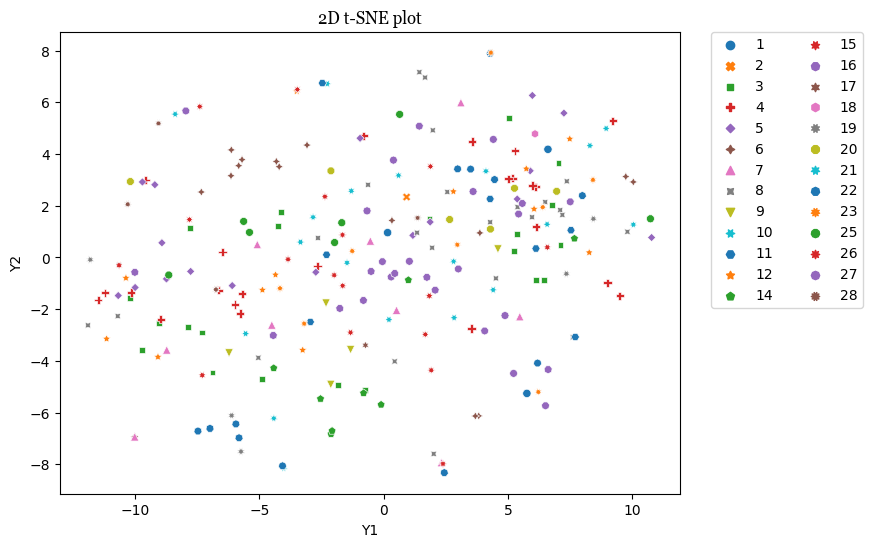

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


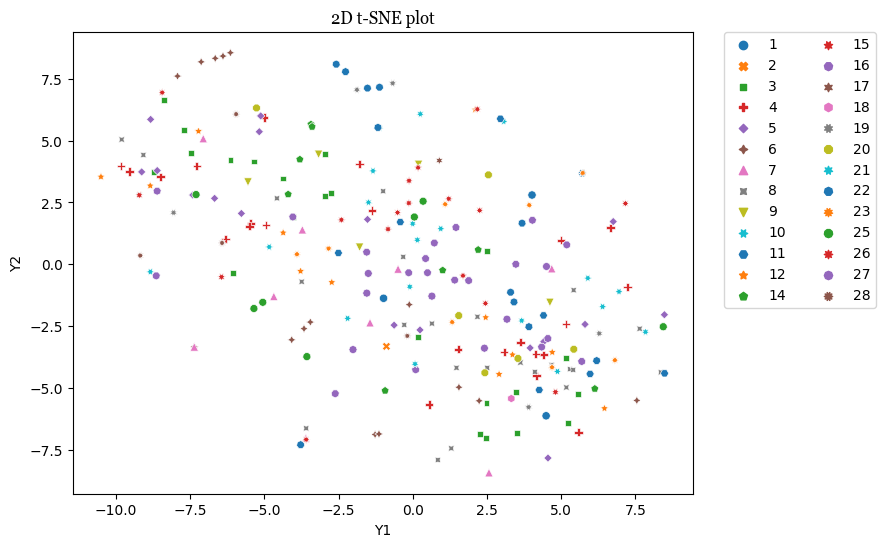

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


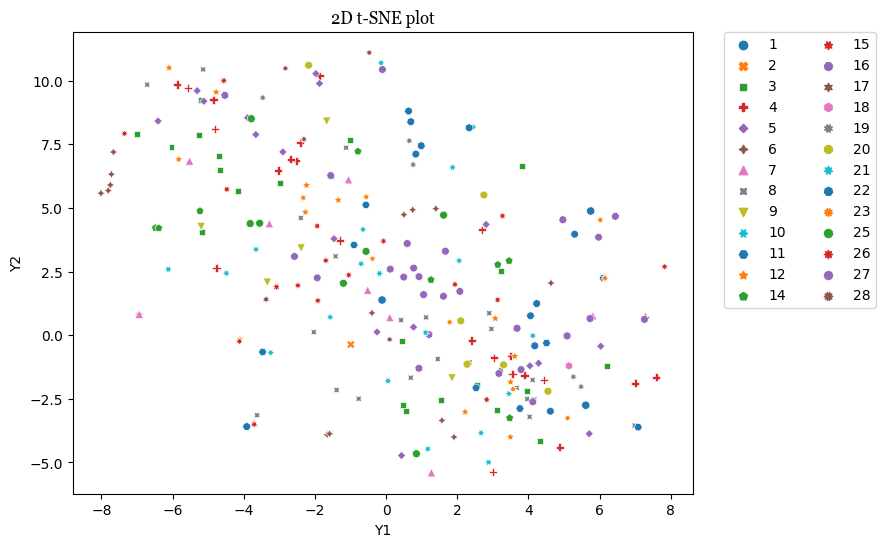

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


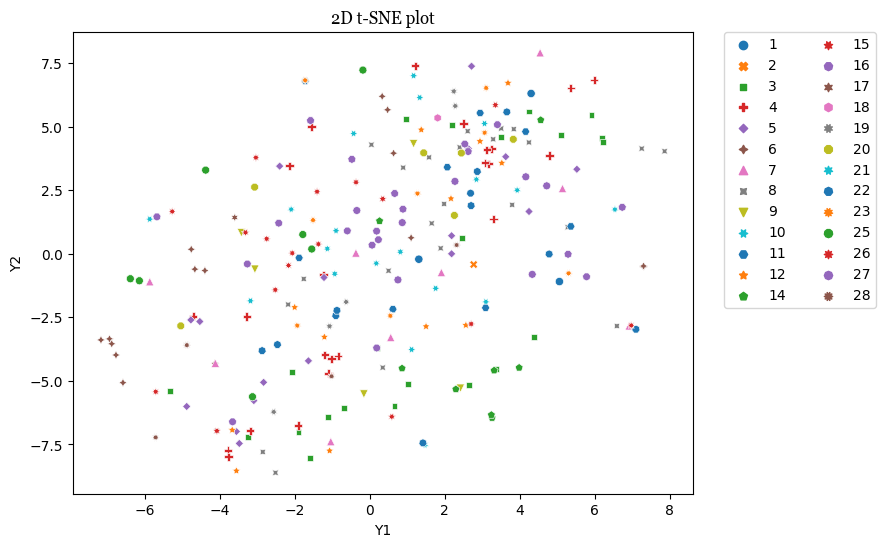

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


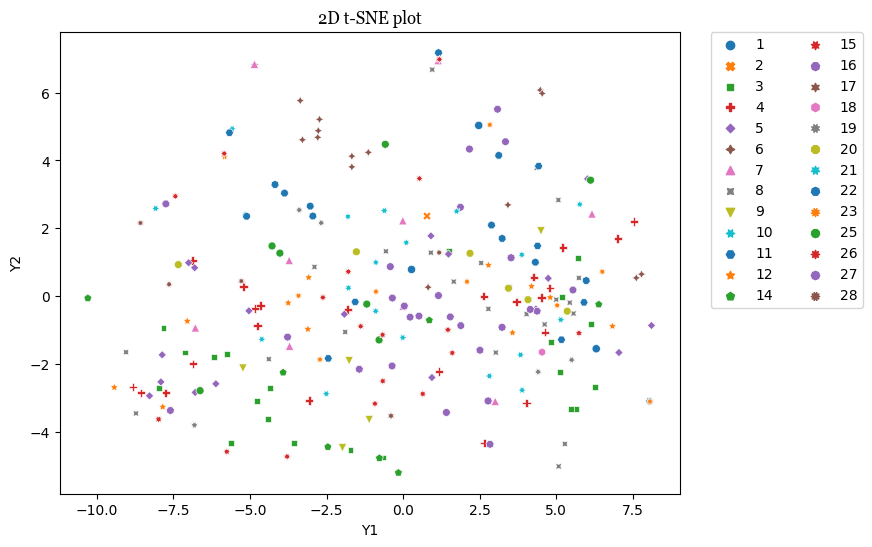

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


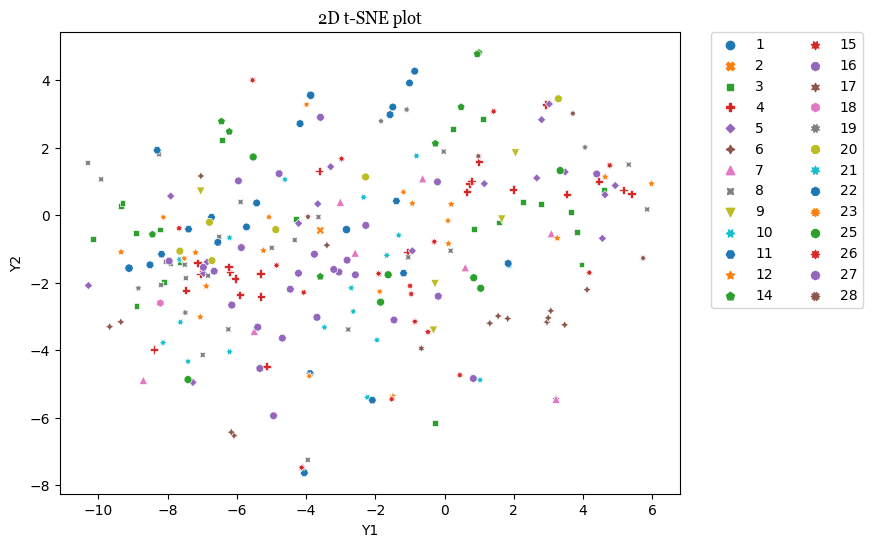

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


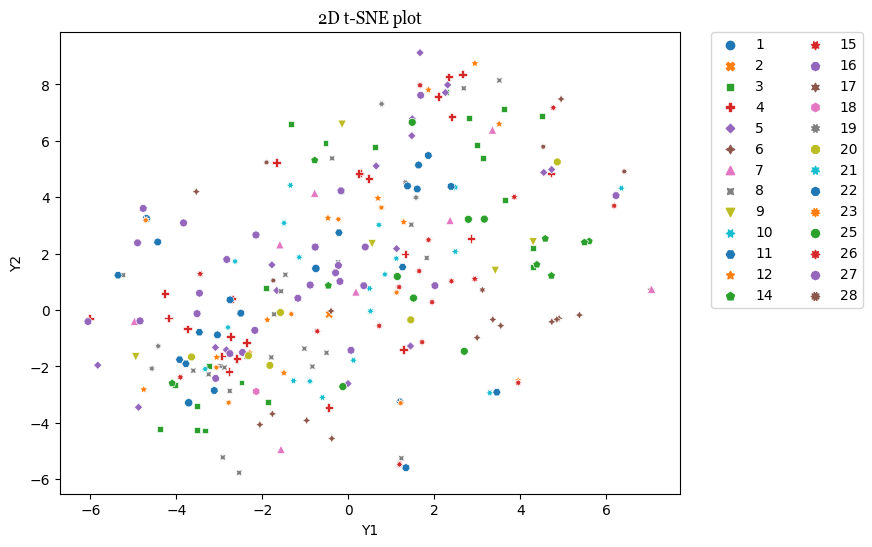

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


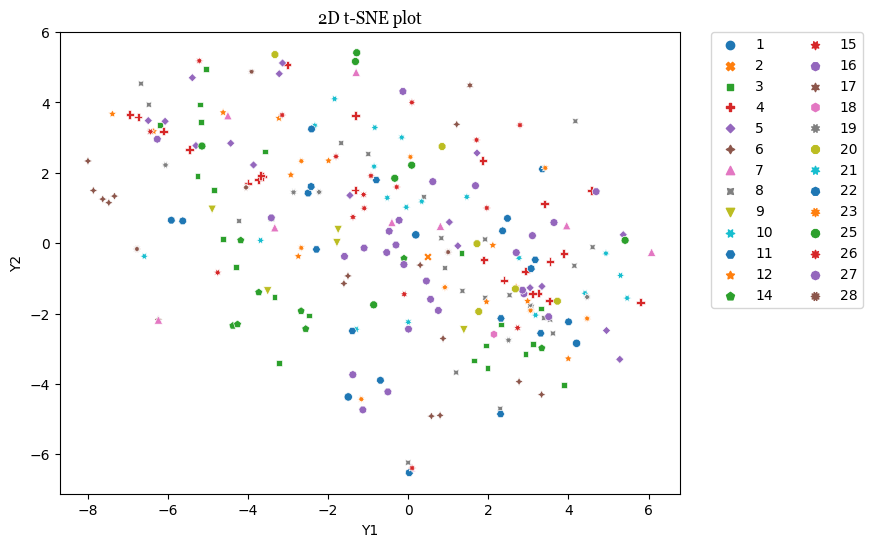

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3193776723.py:14: UserWarning: 
The palette list has fewer values (10) than needed (26) and will cycle, which may produce an uninterpretable plot.
  sns.scatterplot(


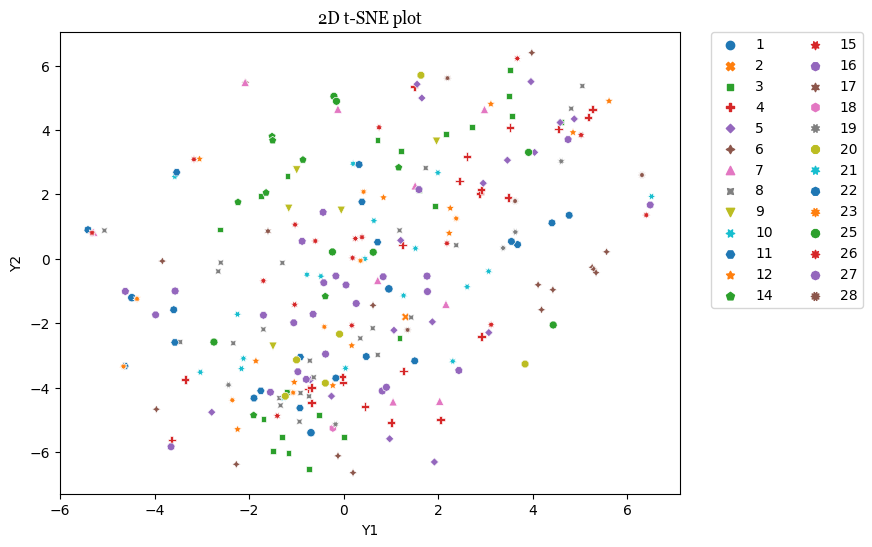

In [157]:
for i in range(3,50,2):    
    results = TSNE(n_components=2, random_state=0, perplexity=i, n_iter=5000).fit_transform(IndexedData.loc[:, IndexedData.columns != "Topic"])

    # Building a new df for better visualization of t-SNE results
    df = pd.DataFrame()
    df["Topic"] = IndexedData["Topic"].values
    df["Y1"] = results[:,0]
    df["Y2"] = results[:,1]
    # Building a scatter plot for the t-SNE results
    csfont = {'fontname':'Arial'} # setting font for axis labels
    hfont = {'fontname':'Georgia'} # setting font for title

    plt.figure(figsize=(8,6)) # setting size of the graph
    sns.scatterplot(

        x="Y1", y="Y2", # Data to plot
        hue="Topic",  # Group by Topic
        palette=sns.color_palette(), # Apply a given color palette
        style = "Topic", # Ensure that each topic has a different style
        data=df, # Data source file
        legend="full", # Adding a legend
        
    ).set_title("2D t-SNE plot", fontdict = hfont) # Adding a title with the font hfont

    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left', borderaxespad=0, ncol = 2) # Placing the legend on the graph
    plt.show()


In [141]:
df

Topic         Y1         Y2
0        1 -16.030872  76.563019
1        1 -58.665314 -17.779764
2        1  14.887531   6.387857
3        2 -55.306763 -15.097180
4        3 -35.400223  36.564381
..     ...        ...        ...
247     27 -29.231600 -22.247911
248     21  -2.622478  30.332743
249     28  -9.505999  17.927032
250     28  51.487816  40.256454
251     22  -2.622473  30.332884

[252 rows x 3 columns]

In [155]:
from scipy.stats import multivariate_normal
import numpy as np
from scipy.stats import chi2

data = df.loc[:, df.columns != "Topic"].to_numpy()

#calculate the covariance matrix
covariance_matrix = np.cov(np.stack(data, axis=1))
cov_pm1 = np.linalg.matrix_power(covariance_matrix,-1)
centerpoint = np.mean(data, axis = 0)

distances = []
for i, val in enumerate(data):
    p1=val
    p2 = centerpoint
    distance = (p1-p2).T.dot(cov_pm1).dot(p1-p2)
    distances.append(distance)
distances = np.array(distances)

cutoff = chi2.ppf(0.90, data.shape[1])

outliersIndexes = np.where(distances > cutoff)

print('--- Index of outliers ---')
print(outliersIndexes)

print('--- Observations found as outliers ---')
print(data[distances > cutoff, :])


--- Index of outliers ---
(array([  0,  96, 192, 208, 216, 236, 248, 250, 251], dtype=int64),)
--- Observations found as outliers ---
[[-27.618414  -39.900974 ]
 [  1.9299146 -67.43644  ]
 [ 22.100119   37.088585 ]
 [  3.0329454  60.42691  ]
 [ 48.204334   -4.8690643]
 [  2.9595418  57.528423 ]
 [-50.793697   -9.895375 ]
 [ 21.731049   41.303696 ]
 [-49.580036   -9.131957 ]]


In [74]:
from matplotlib import patches

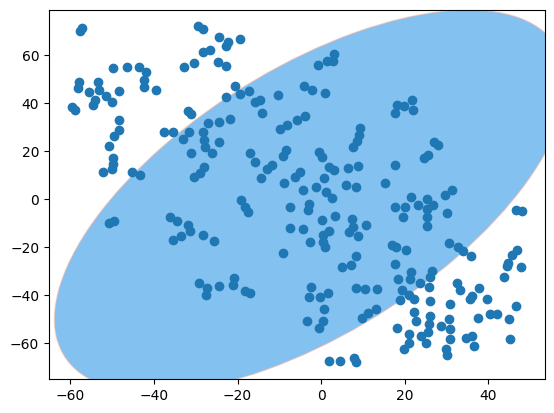

In [156]:
pearson = covariance_matrix[0,1]/np.sqrt(covariance_matrix[0,0] * covariance_matrix[1,1])
ell_radius_x = np.sqrt(1 + pearson)
eli_radius_y = np.sqrt(1-pearson)

lambda_, v = np.linalg.eig(covariance_matrix)
lambda_ = np.sqrt(lambda_)

ellipse = patches.Ellipse(xy = (centerpoint[0], centerpoint[1]), width = lambda_[0]*np.sqrt(cutoff)*2, height = lambda_[1]*np.sqrt(cutoff)*2, angle = np.rad2deg(np.arccos(v[0,0])), edgecolor = "#fab1a0")
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)
fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

In [79]:
outliersIndexes[0].shape

(0,)

In [98]:
import numpy as np
import math

x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])
tss = []

for i in range(0,252):

    tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

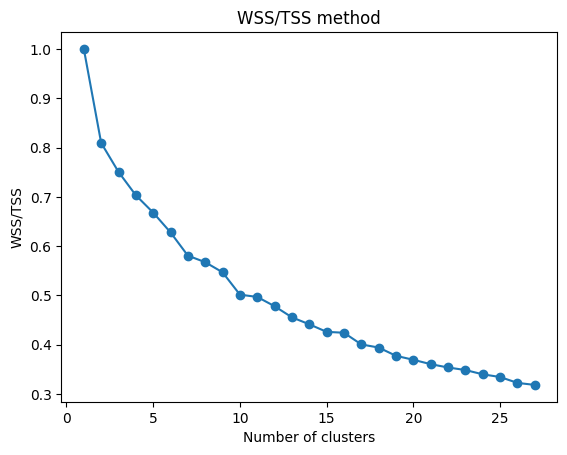

In [99]:
from sklearn.cluster import KMeans

inertias = []

for i in range(1,28):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(x)
    inertias.append(kmeans.inertia_ / sum(tss))

plt.plot(range(1,28), inertias, marker='o')
plt.title('WSS/TSS method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS/TSS')
plt.show()

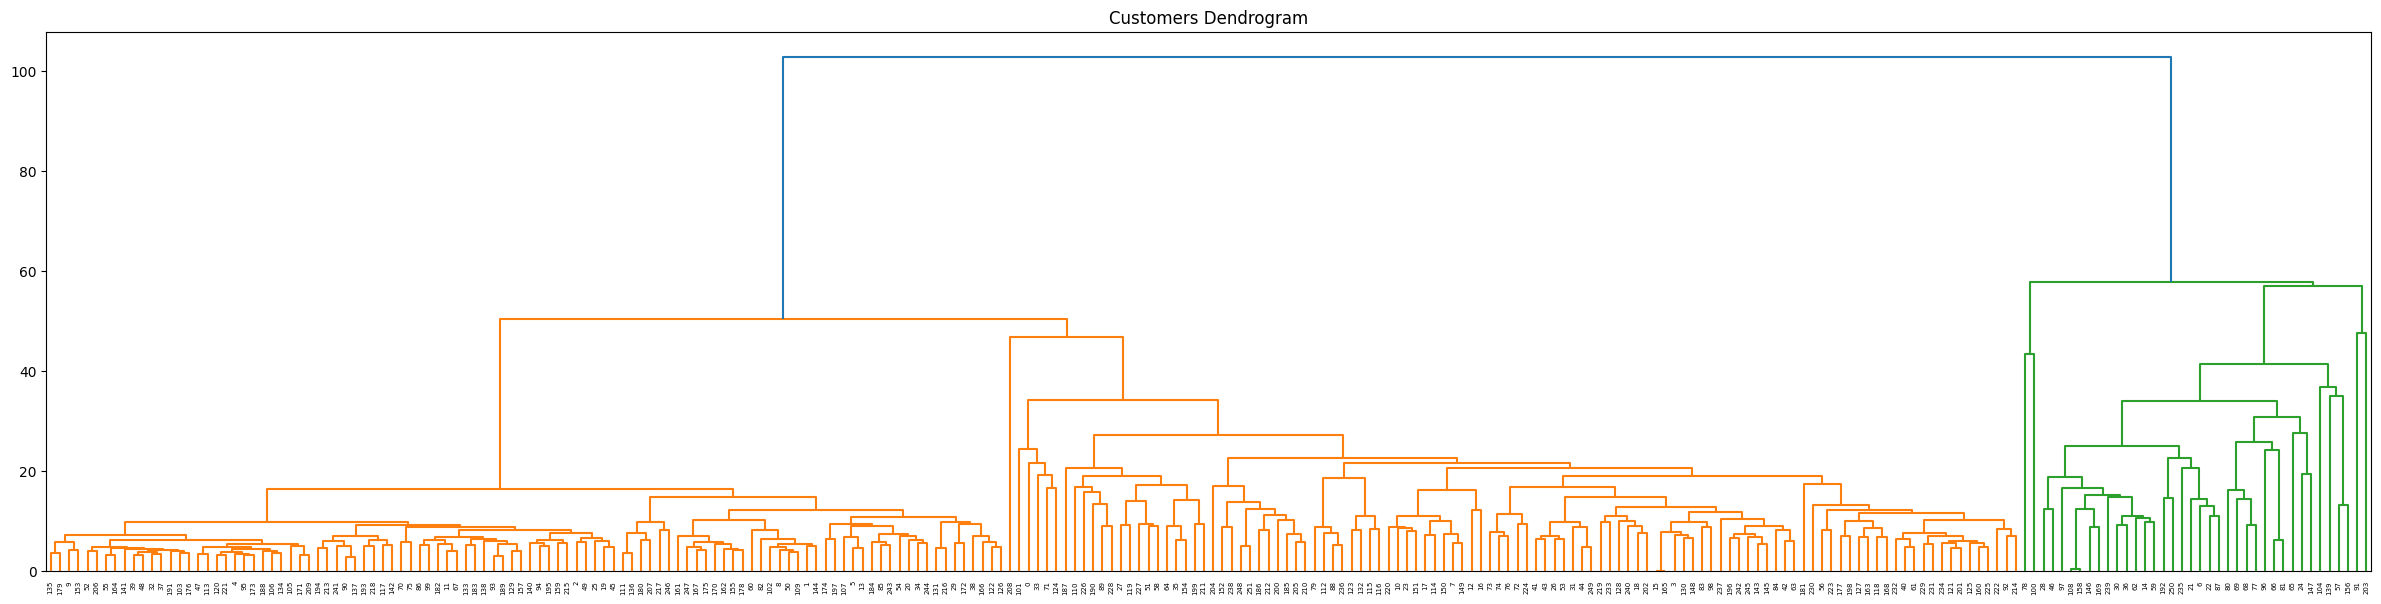

In [100]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
selected_data = x
clusters = shc.linkage(selected_data, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

Topic by Topic

In [15]:
# Creating a function for building tSNE plots
def tSNEPlot(x, topic):

    csfont = {'fontname':'Arial'} # Font name for labels
    hfont = {'fontname':'Georgia'} # Font name for title

    ax = plt.axes()
    ax.scatter(x["Y1"], x["Y2"], c="#d04a02", marker= "v") # Setting data to plot, color, and markers type
    ax.set_title("2D t-SNE plot of Topic " + str(topic), **hfont) # Defining a title and its format
    ax.set_ylabel("Y2", **csfont) # Defining y-label
    ax.set_ylim(-25,25) # Standardizing the scale of y axis
    ax.set_xlabel("Y1", **csfont) # Idem for x axis
    ax.set_xlim(-25,25)

    ax.set_facecolor((218 / 255, 222 / 255, 224 / 256)) # Formatting the background's color
    plt.grid(which='major', color='w', linestyle='-') # Adding a grid to the background
    ax.set_axisbelow(True)  # Formatting the axis style
    for spine in ax.spines:
        ax.spines[spine].set_color('white')

    plt.show()

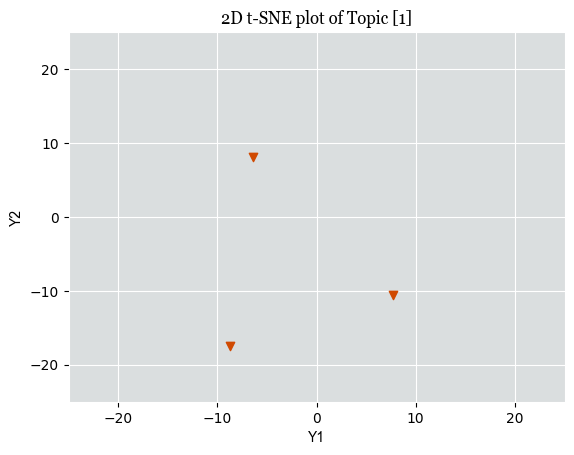

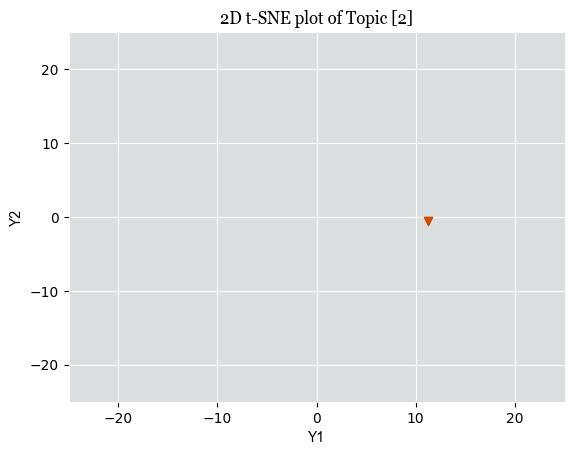

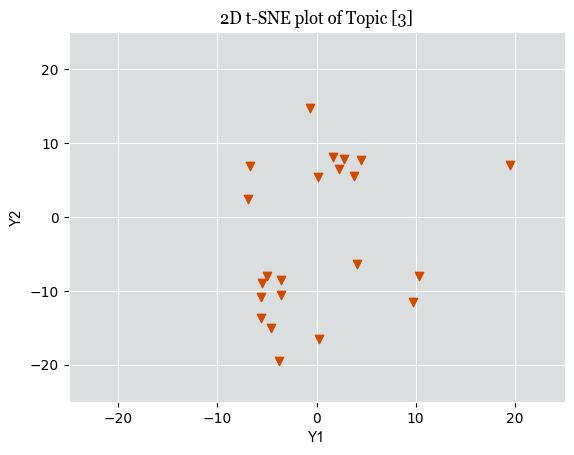

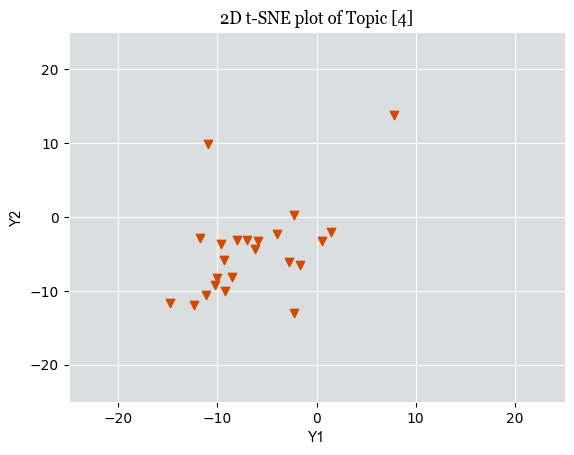

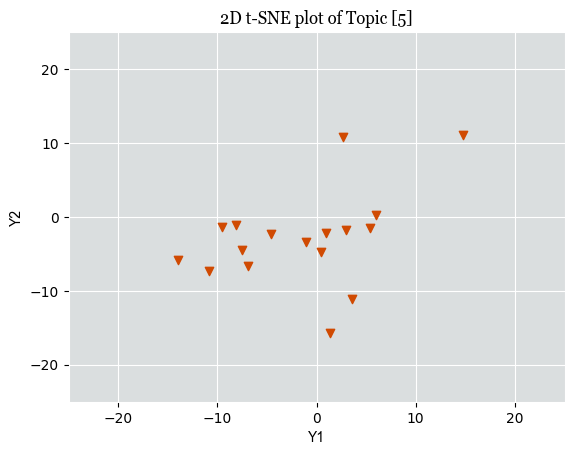

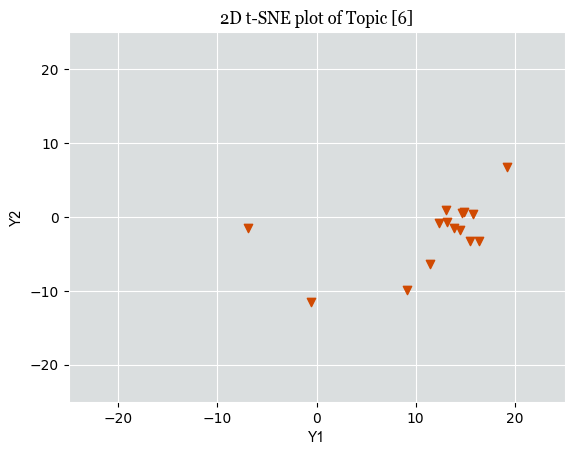

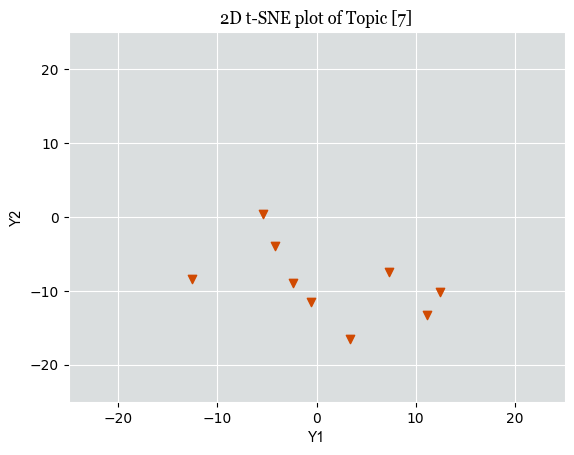

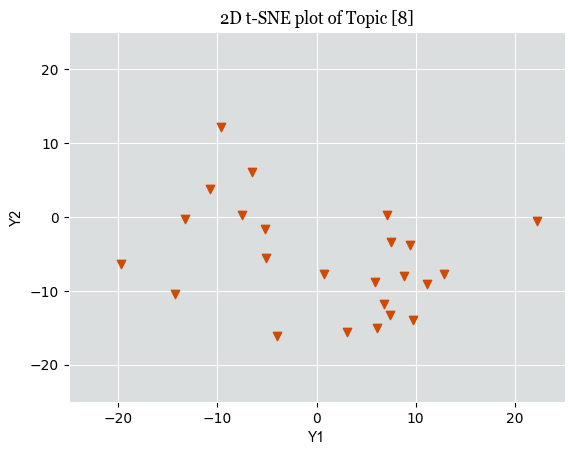

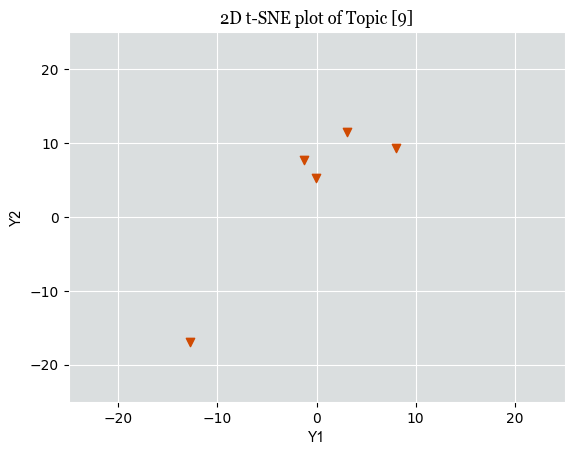

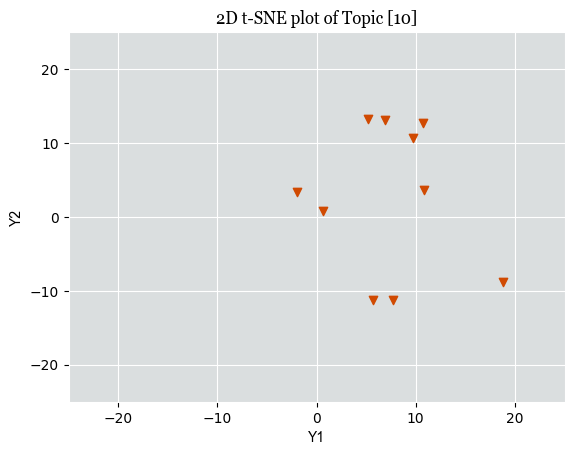

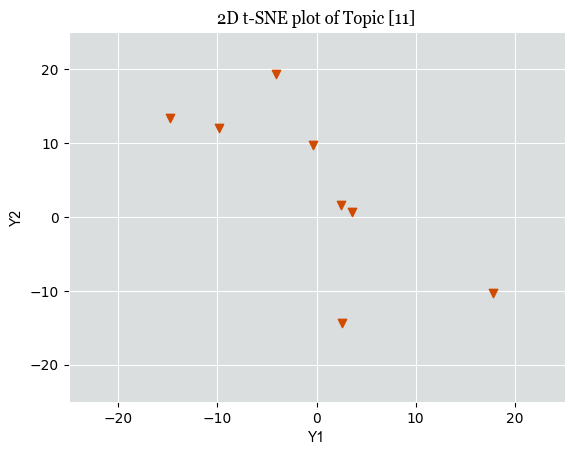

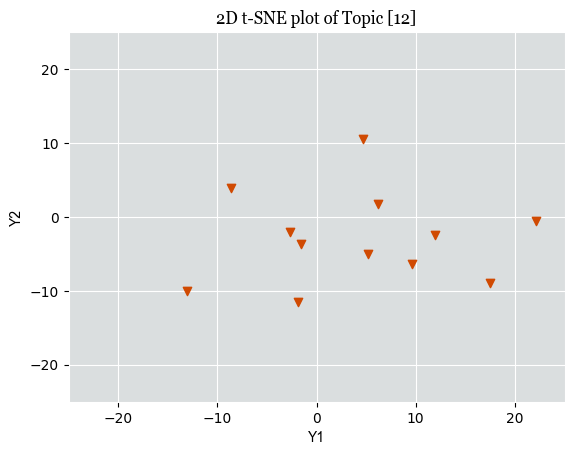

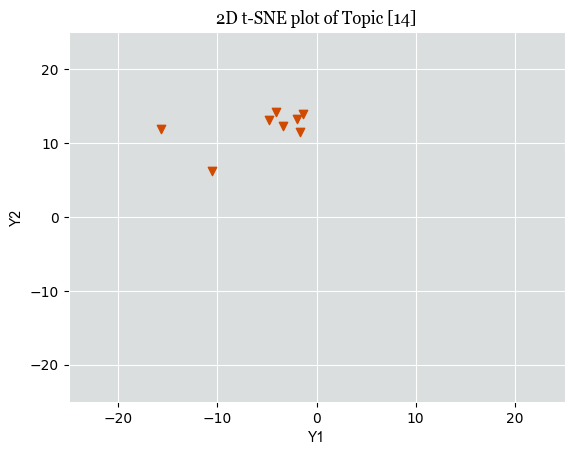

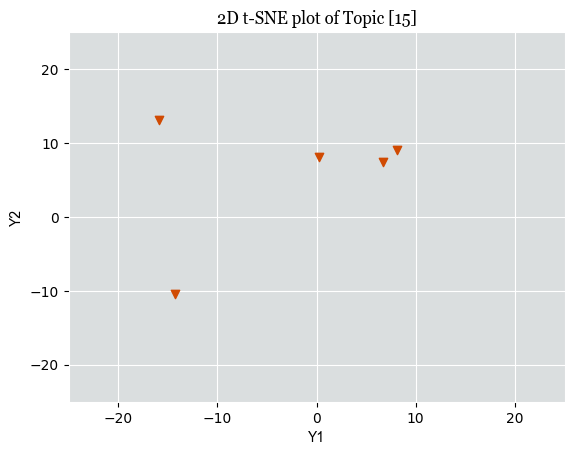

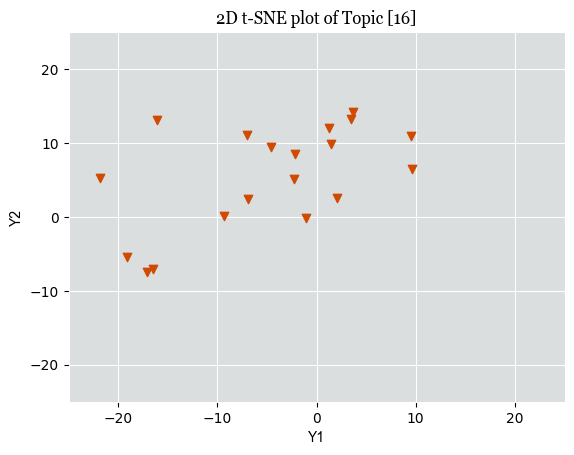

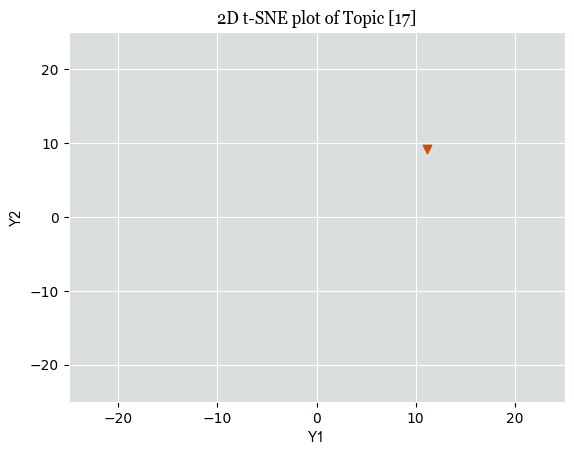

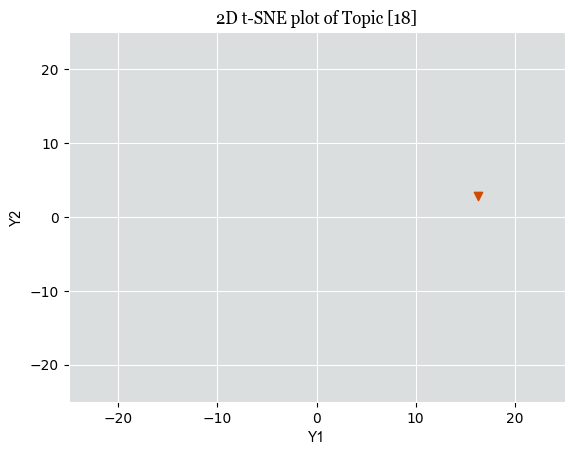

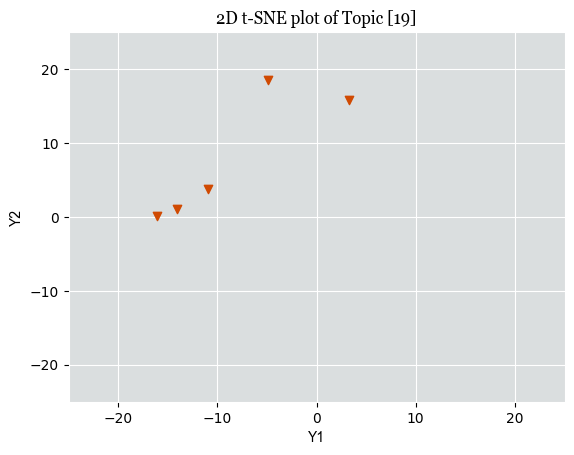

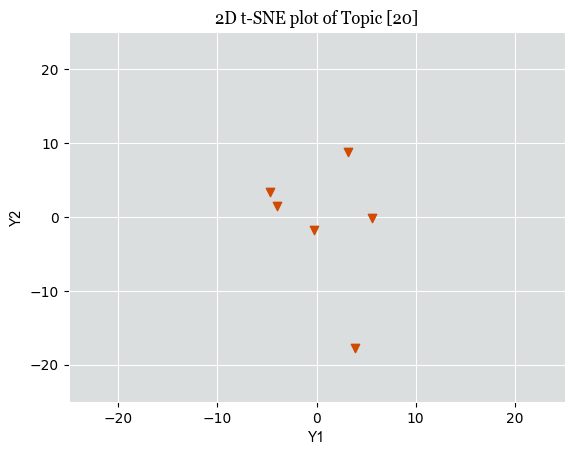

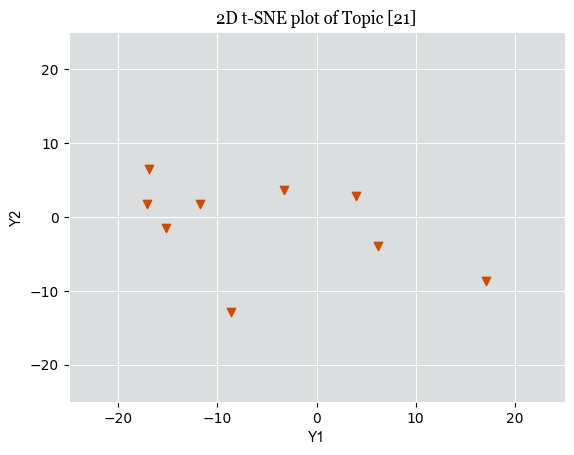

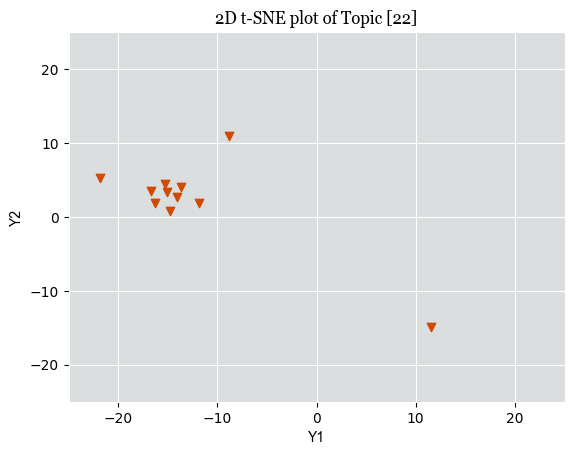

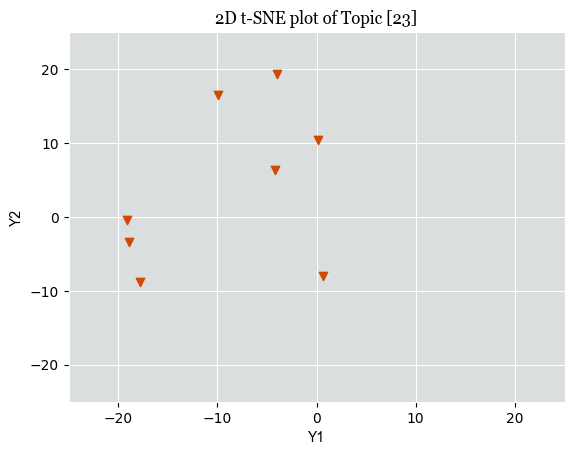

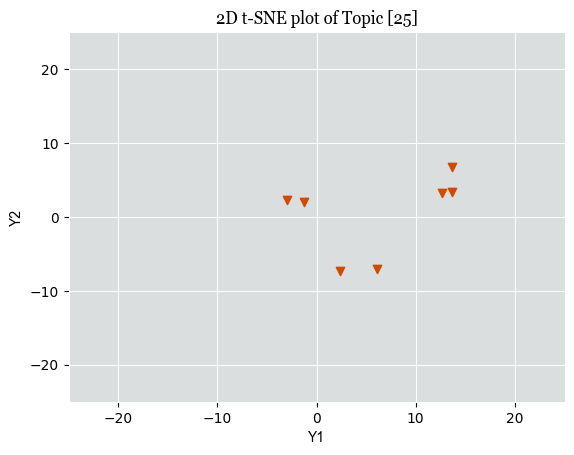

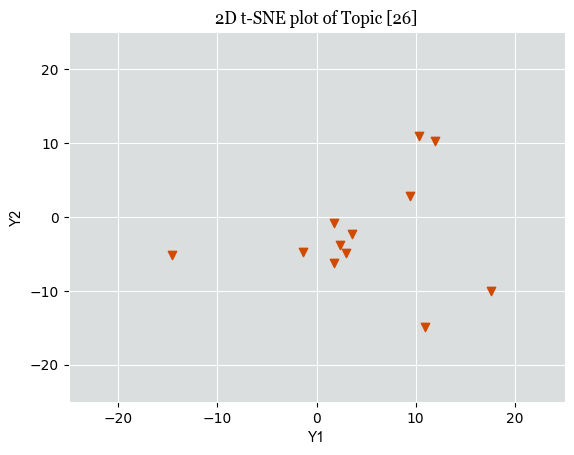

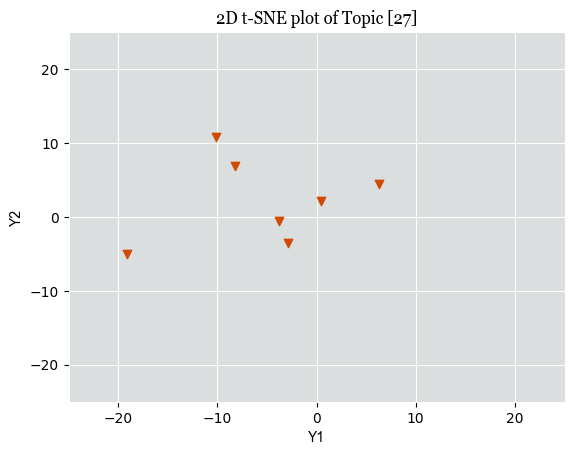

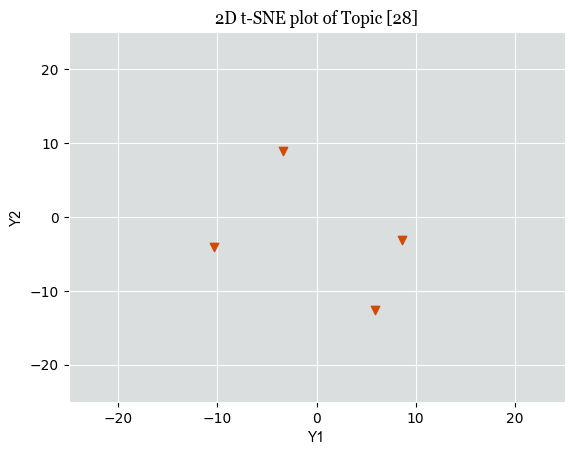

Empty DataFrame
Columns: []
Index: []

In [16]:
# Applying the function on all Topic
df.groupby('Topic').apply(lambda x: tSNEPlot(x, x["Topic"].unique()))

In [17]:
# Define WSS function
from statistics import variance
import numpy as np
import math

def WSS(data):


    x = np.array(data)
    wss = []

    for i in range(0,x.shape[0]):

        wss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(wss)

def TSS(data):

    x = np.array(data)
    size = x.shape[0]
    tss = []

    for i in range(0,size):

        tss.append((math.dist(x[i,:], np.mean(x, axis = 0)))**2)

    return sum(tss)   


In [19]:
# Creating function for dendrogram drawing

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt

def Dendro(x):

    print("Dendrogram: \n")
    plt.figure(figsize=(30, 7))
    plt.title("Topics Dendrogram")

    # Selecting Annual Income and Spending Scores by index
    selected_data = x
    clusters = shc.linkage(selected_data, 
                method='ward', 
                metric="euclidean")
    shc.dendrogram(Z=clusters)
    plt.show()


# Creating function for building elbow method graphs

from sklearn.cluster import KMeans
import numpy as np

def ElbowGraph(x):

    print("Elbow Graph: \n")
    inertias = []
    size = np.array(x).shape[0]

    for i in range(1, size):
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(x)
        inertias.append(kmeans.inertia_ / TSS(x))

    plt.plot(range(1,size), inertias, marker='o')
    plt.title('WSS/TSS method')
    plt.xlabel('Number of clusters')
    plt.ylabel('WSS/TSS')
    plt.show()

# Graph Analysis function
def GraphAnalysis(x):

    print("Cluster Analysis of Topic: \n")

    ElbowGraph(x)
    Dendro(x)


Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


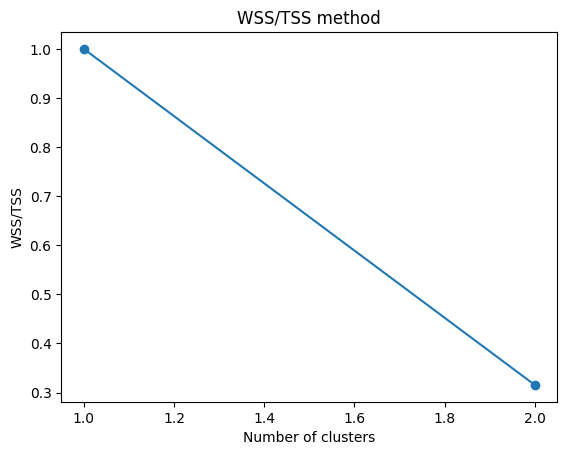

Dendrogram: 



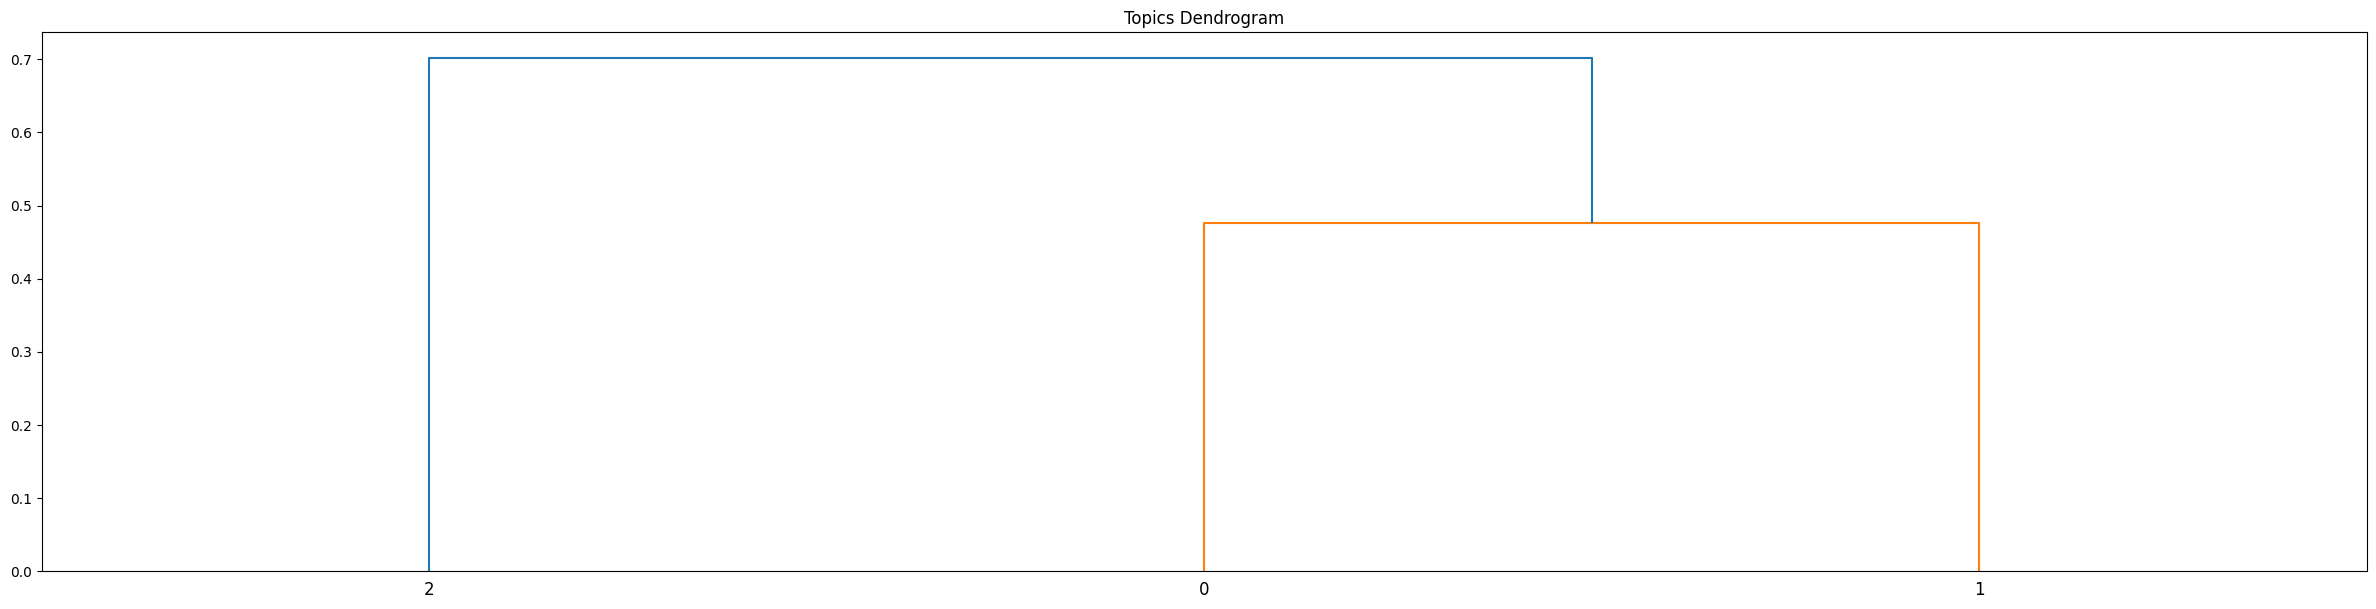

Less than two items in the topic
Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

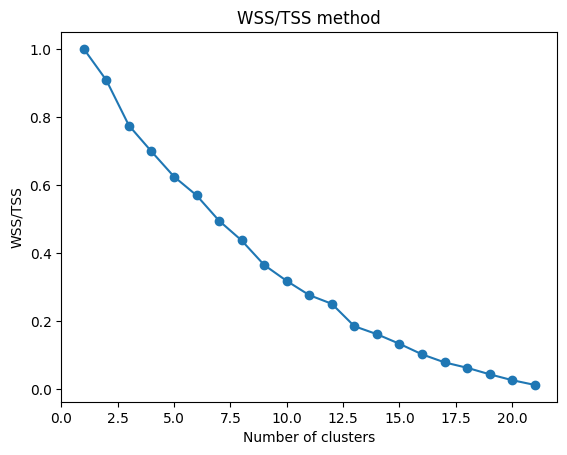

Dendrogram: 



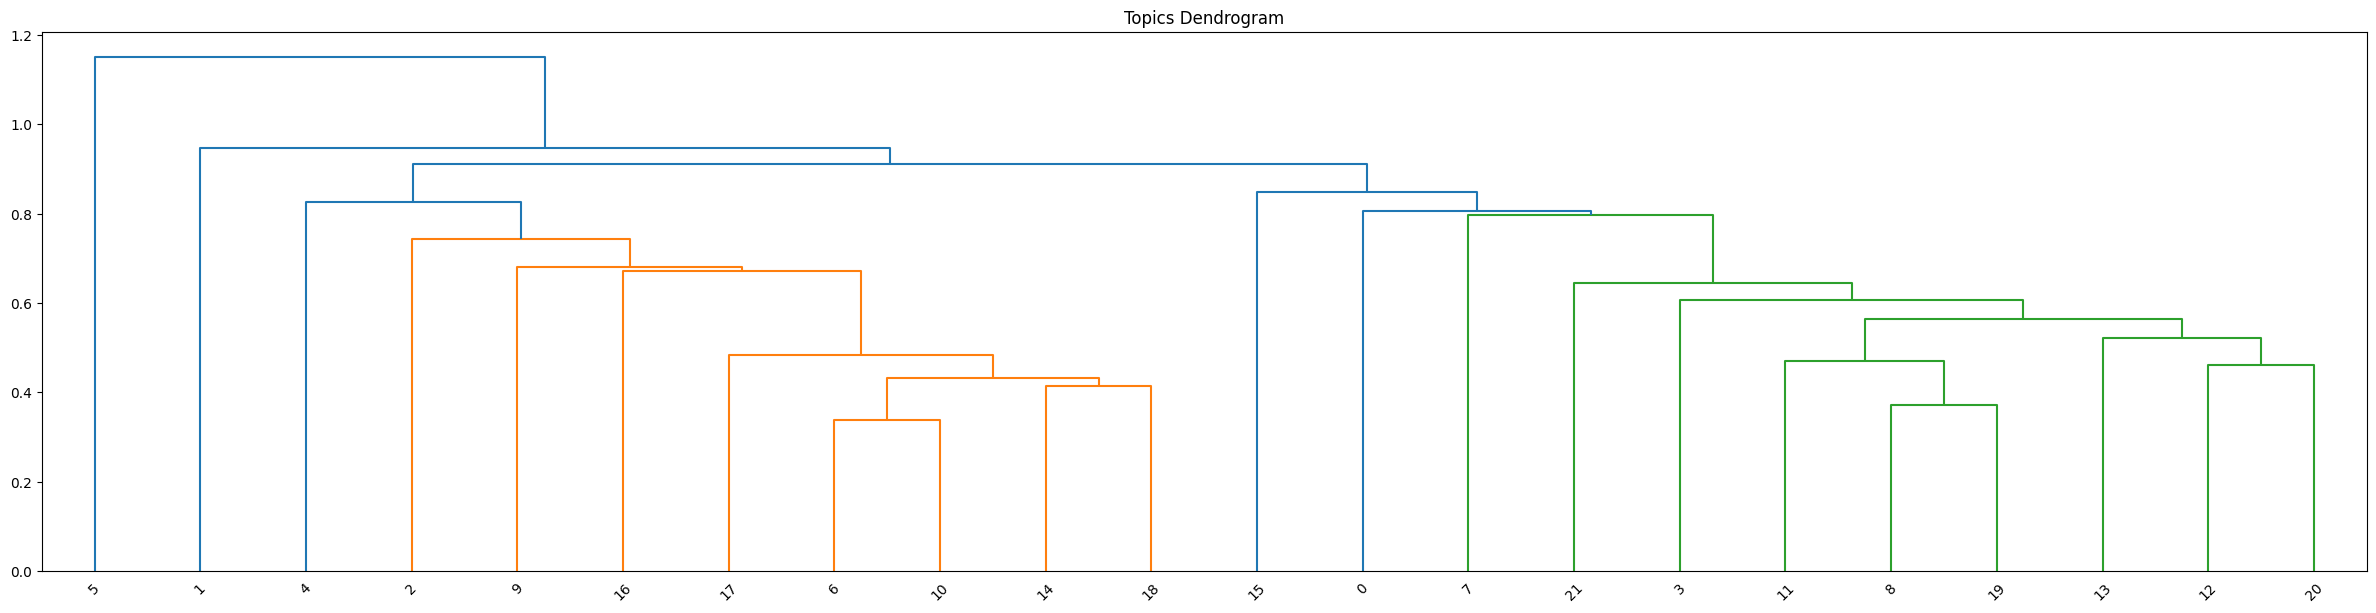

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

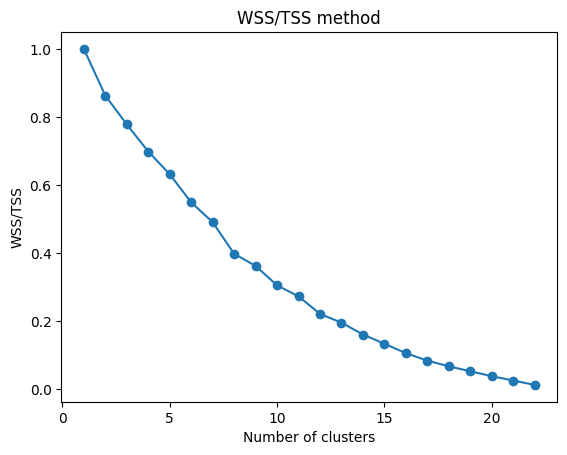

Dendrogram: 



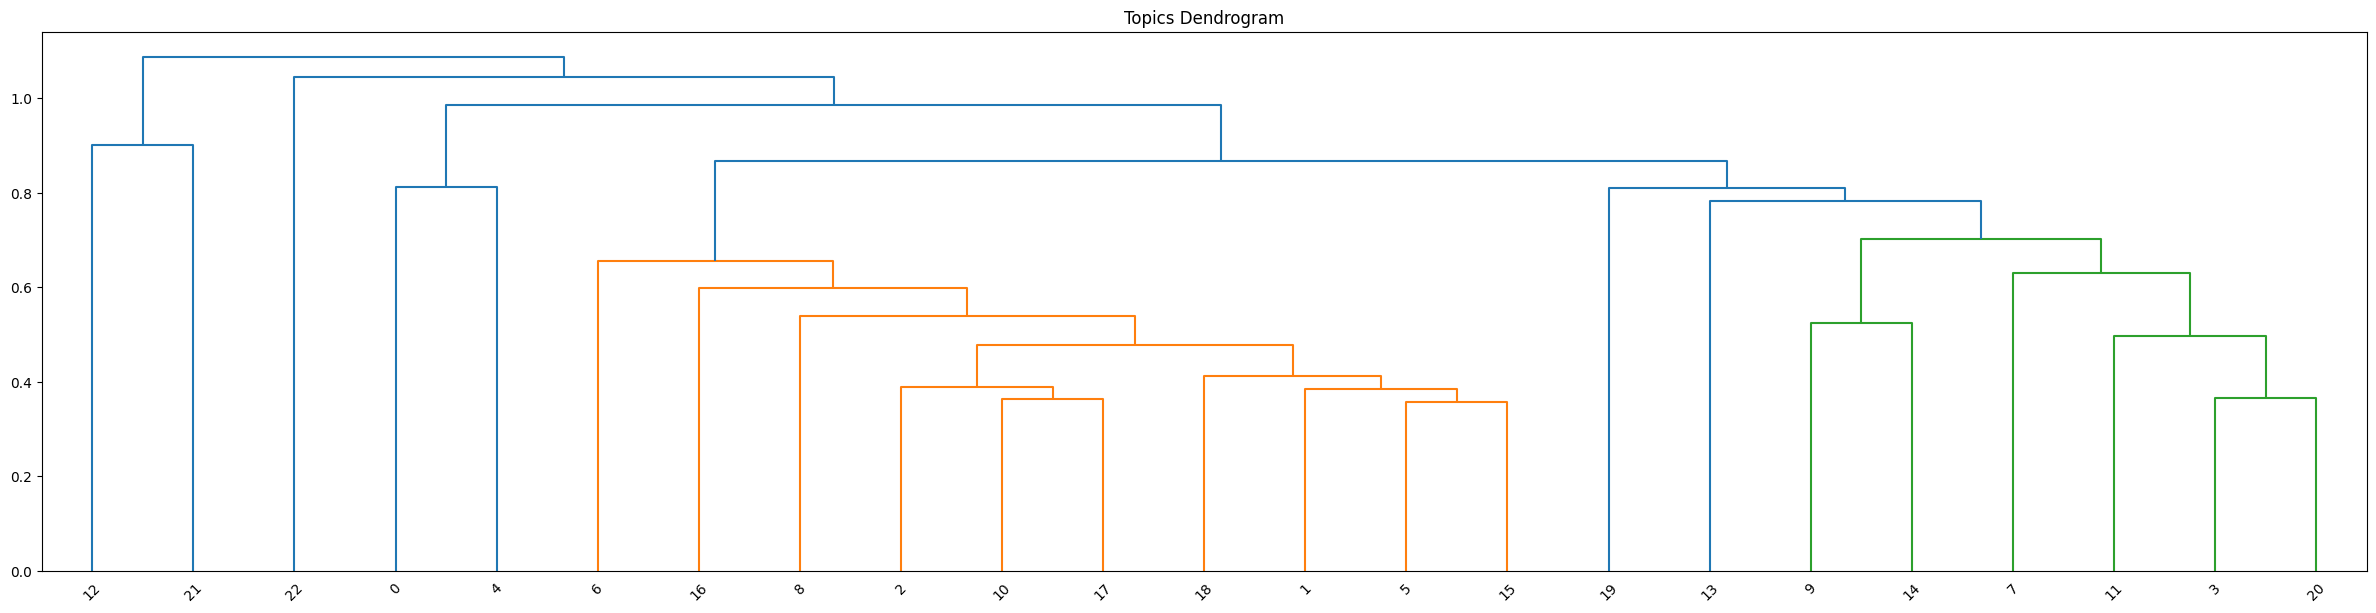

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

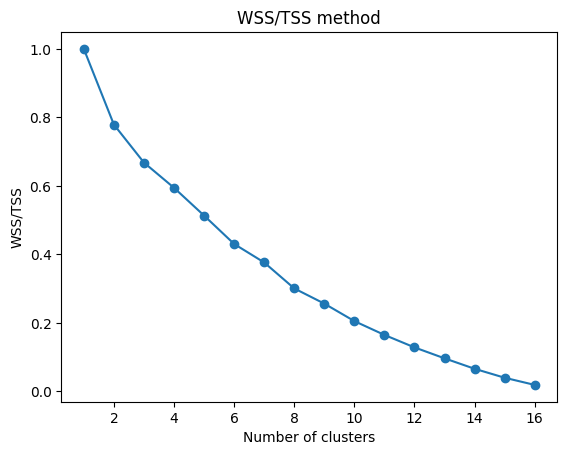

Dendrogram: 



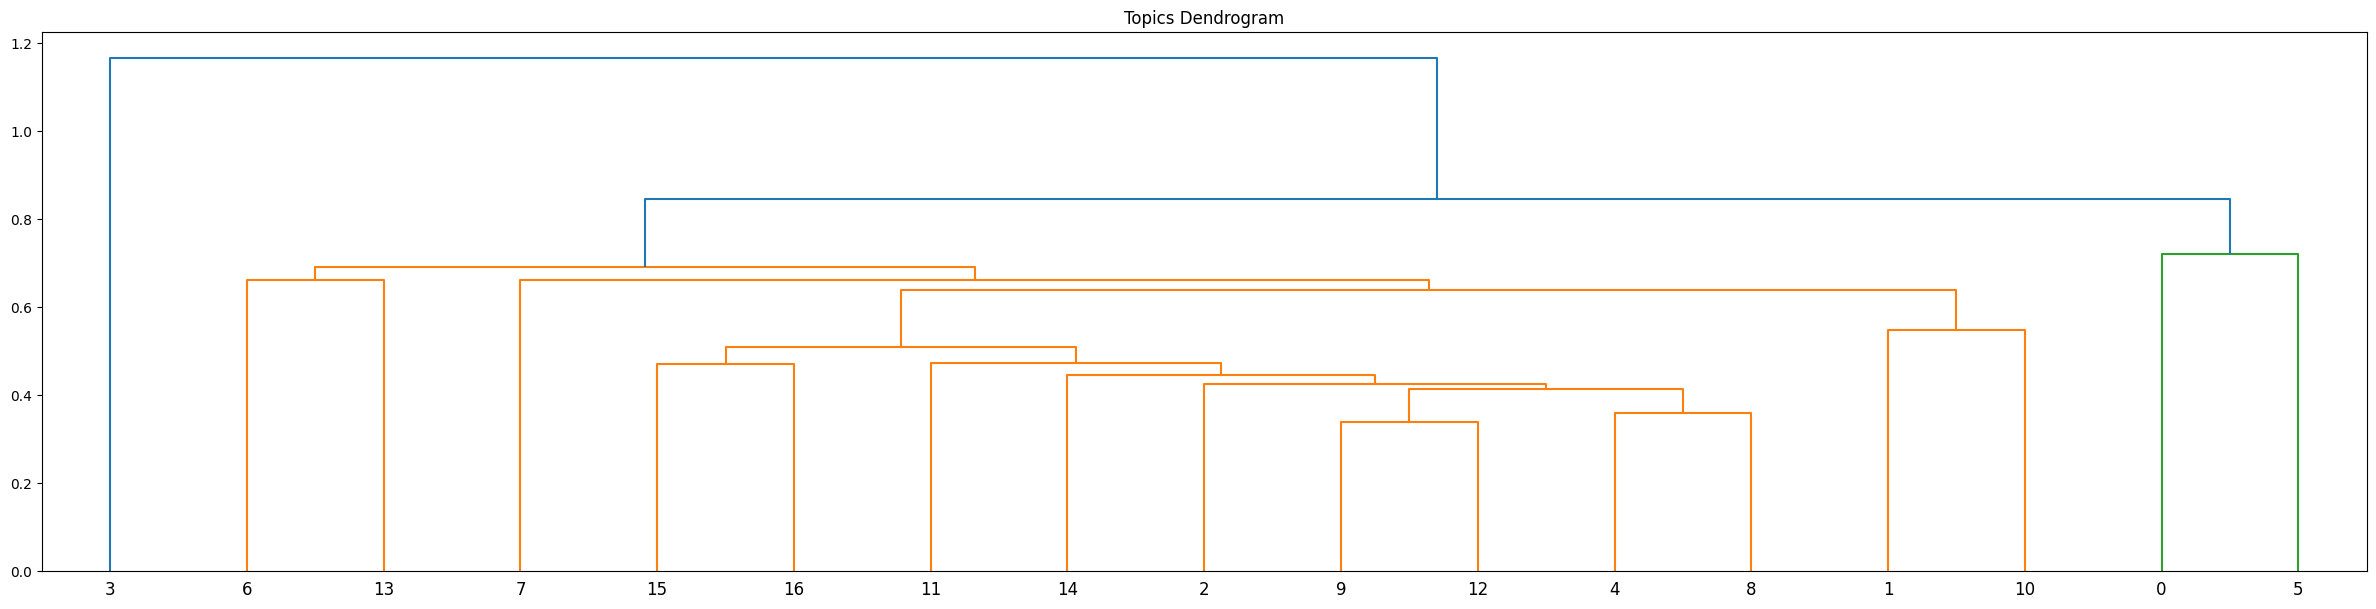

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

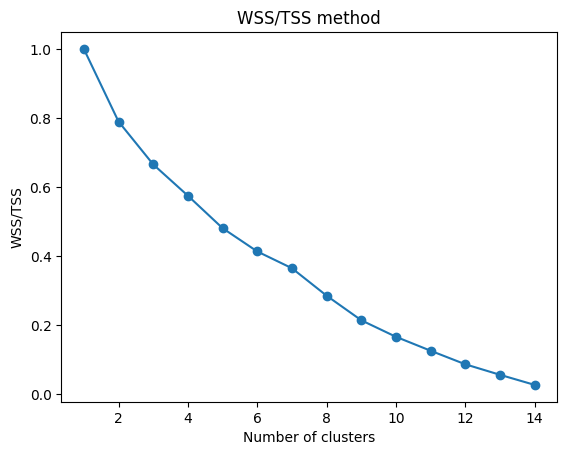

Dendrogram: 



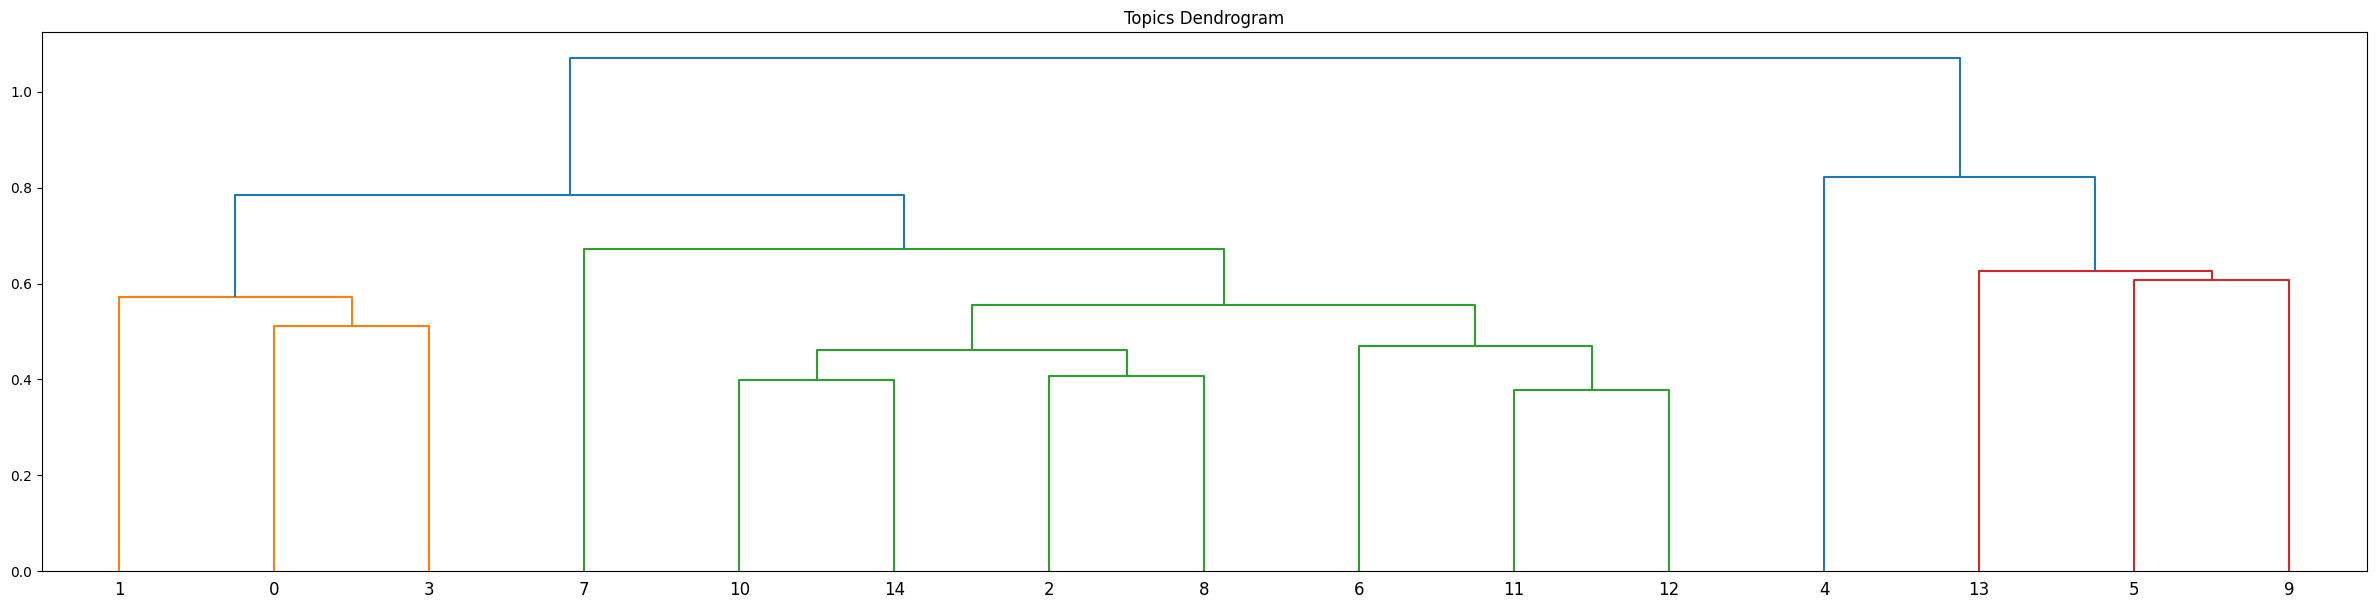

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

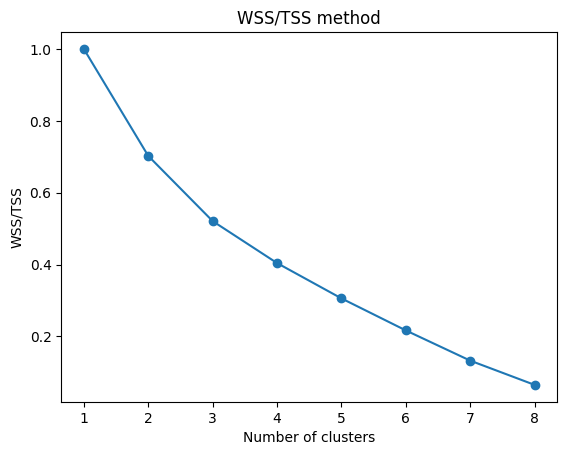

Dendrogram: 



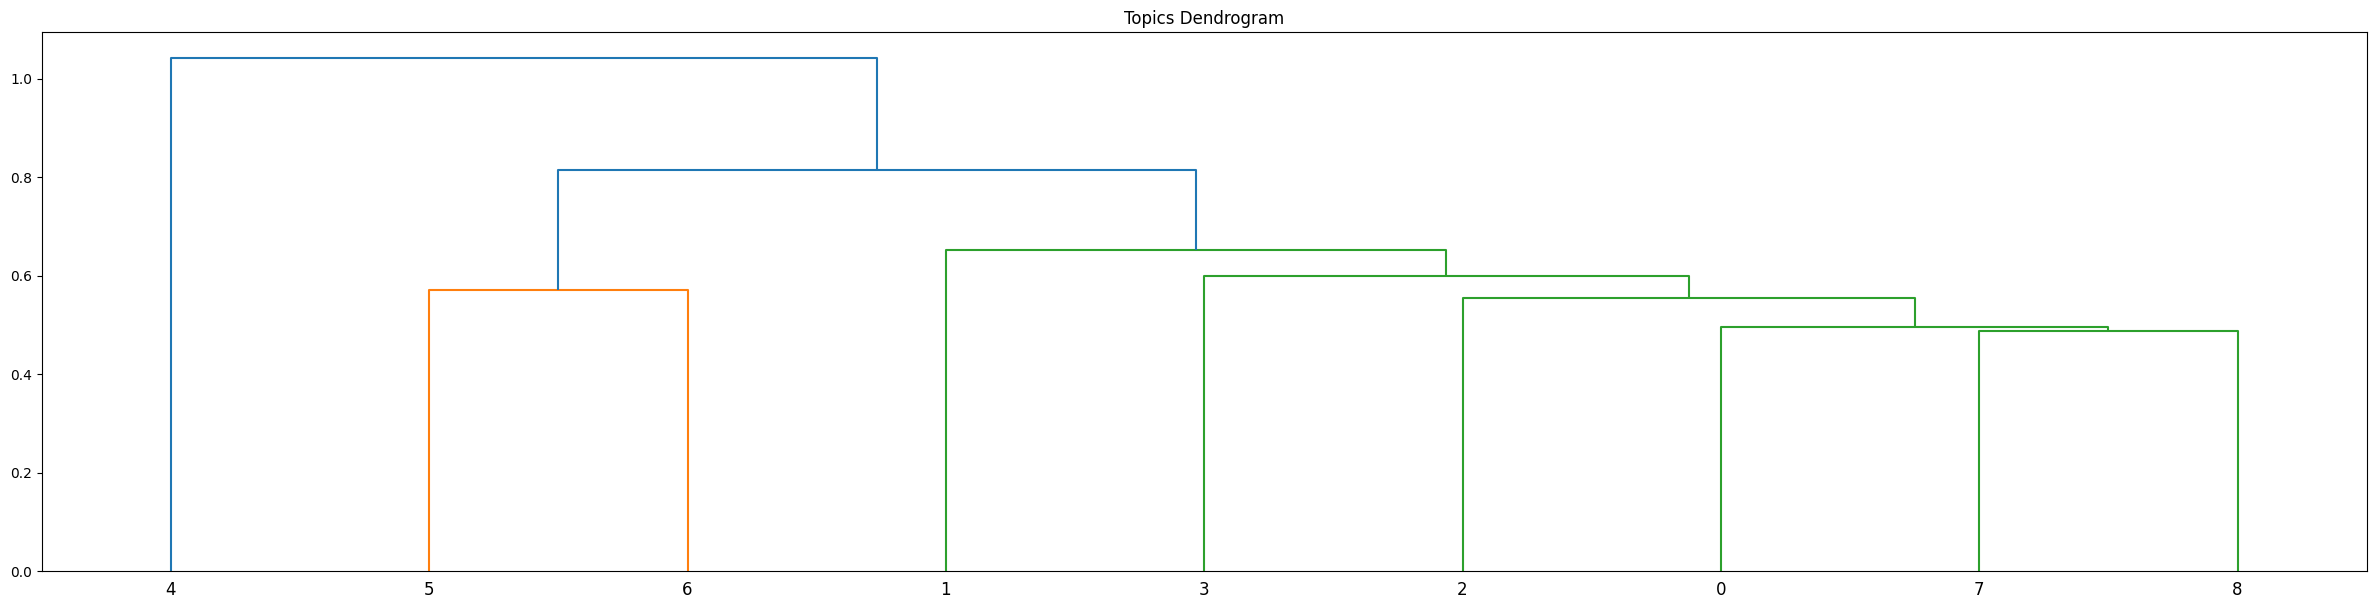

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

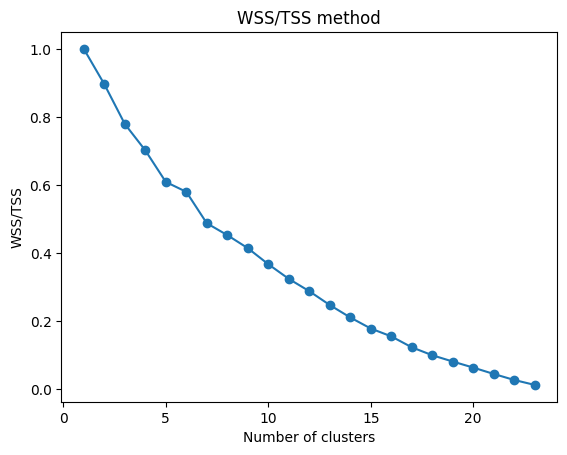

Dendrogram: 



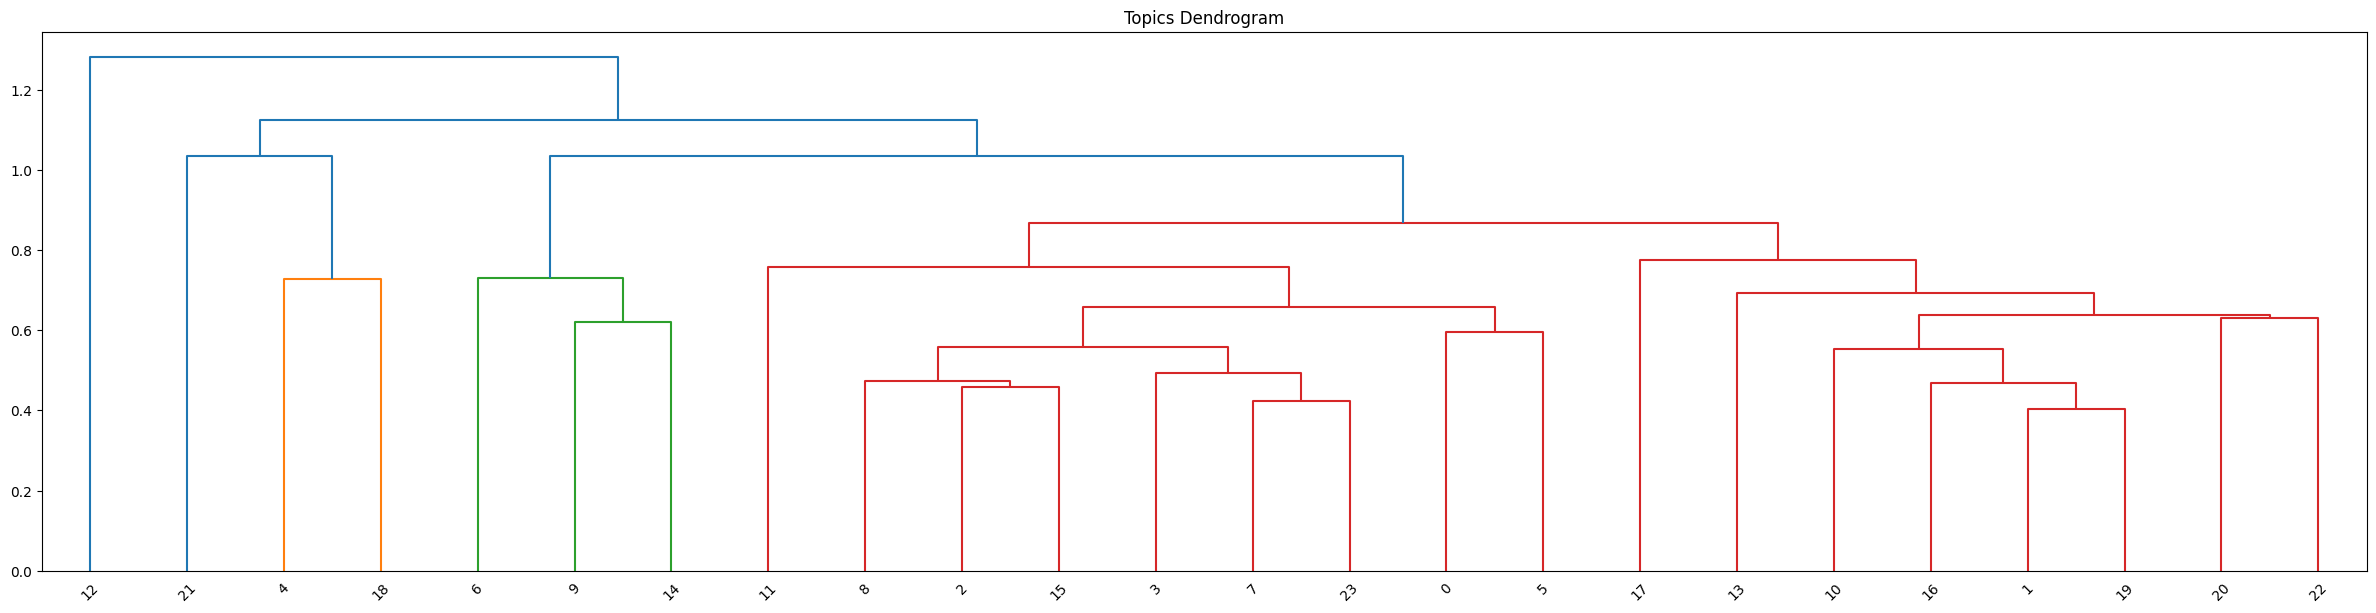

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

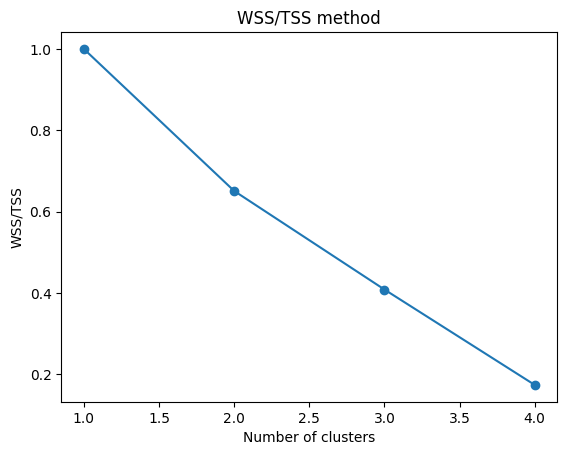

Dendrogram: 



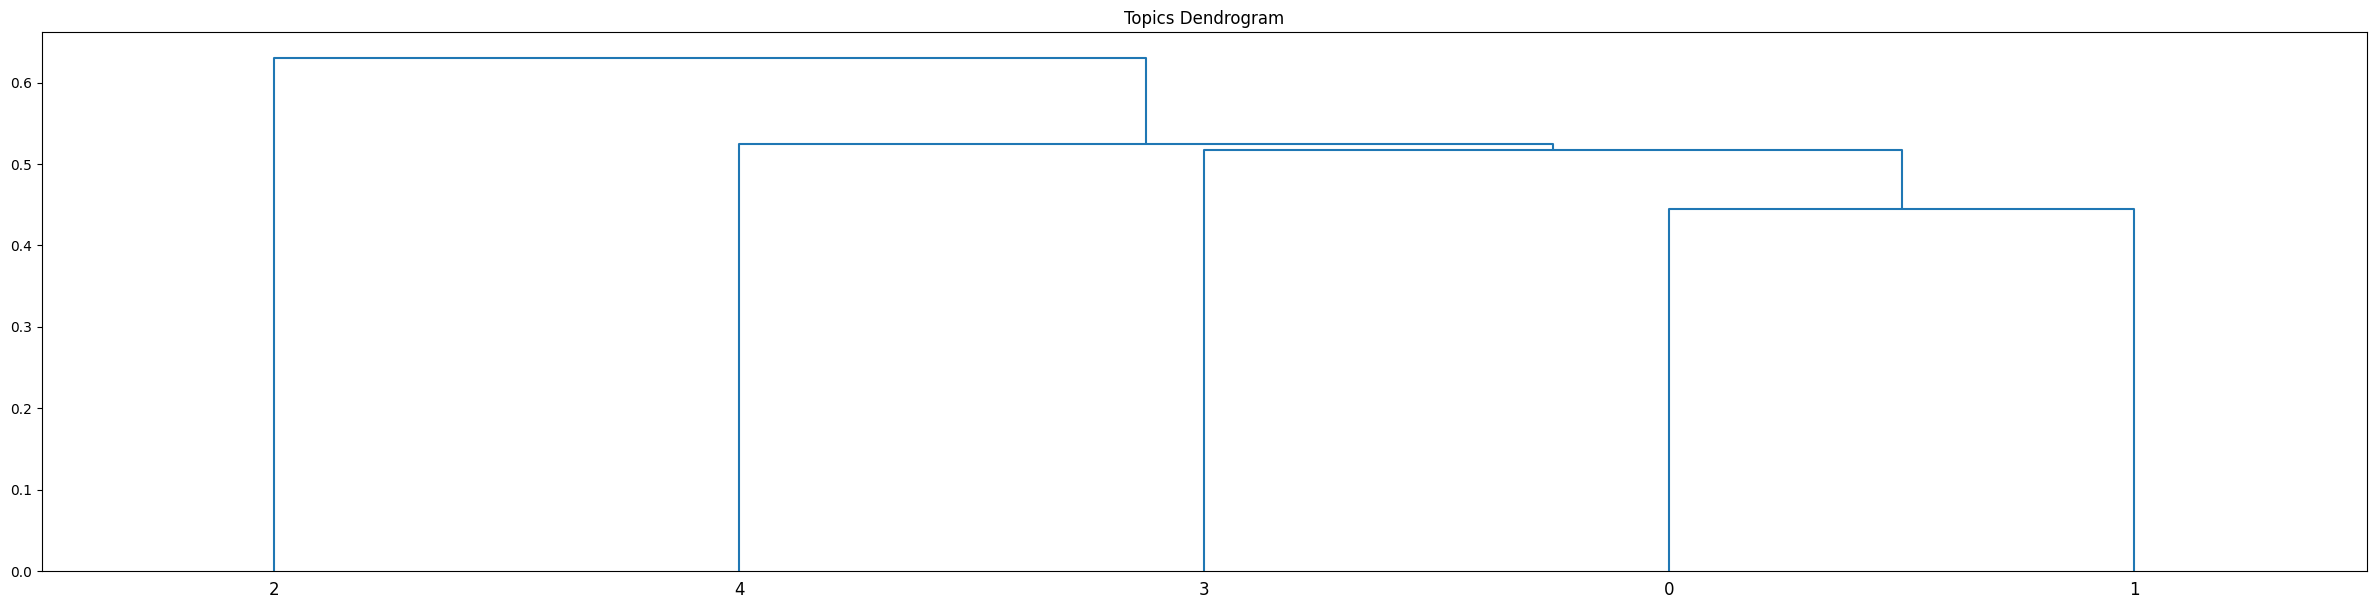

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

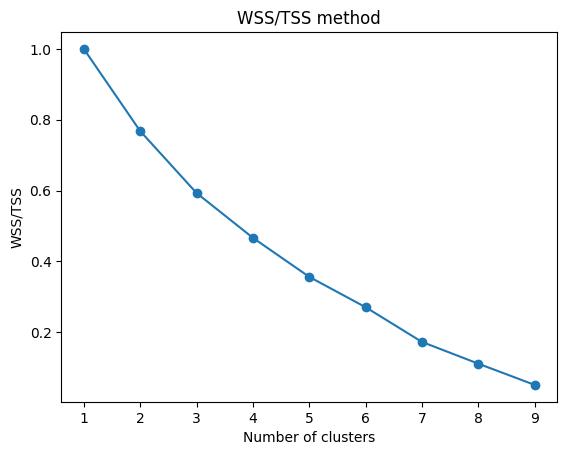

Dendrogram: 



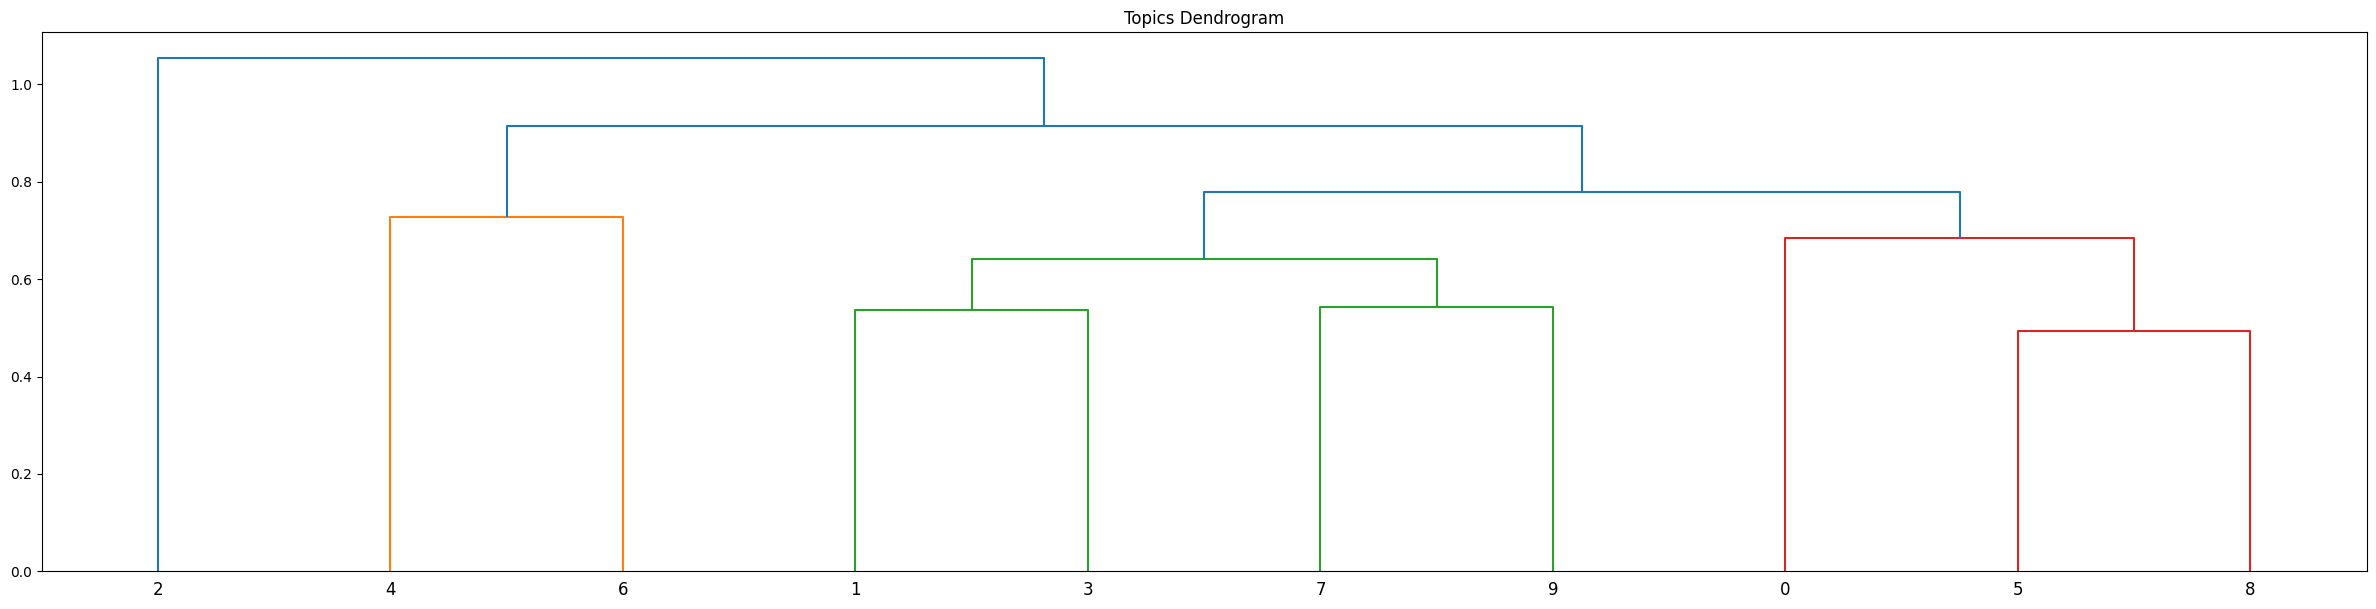

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

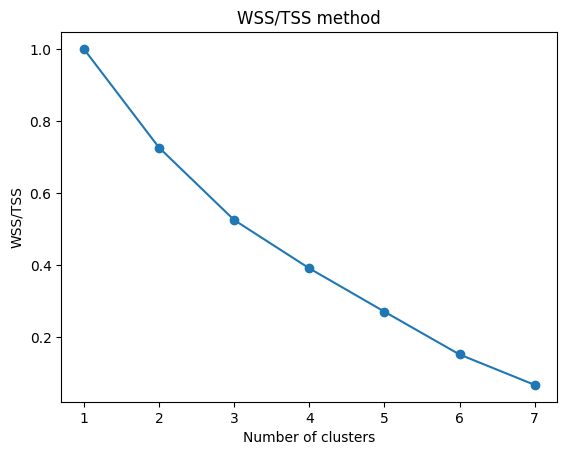

Dendrogram: 



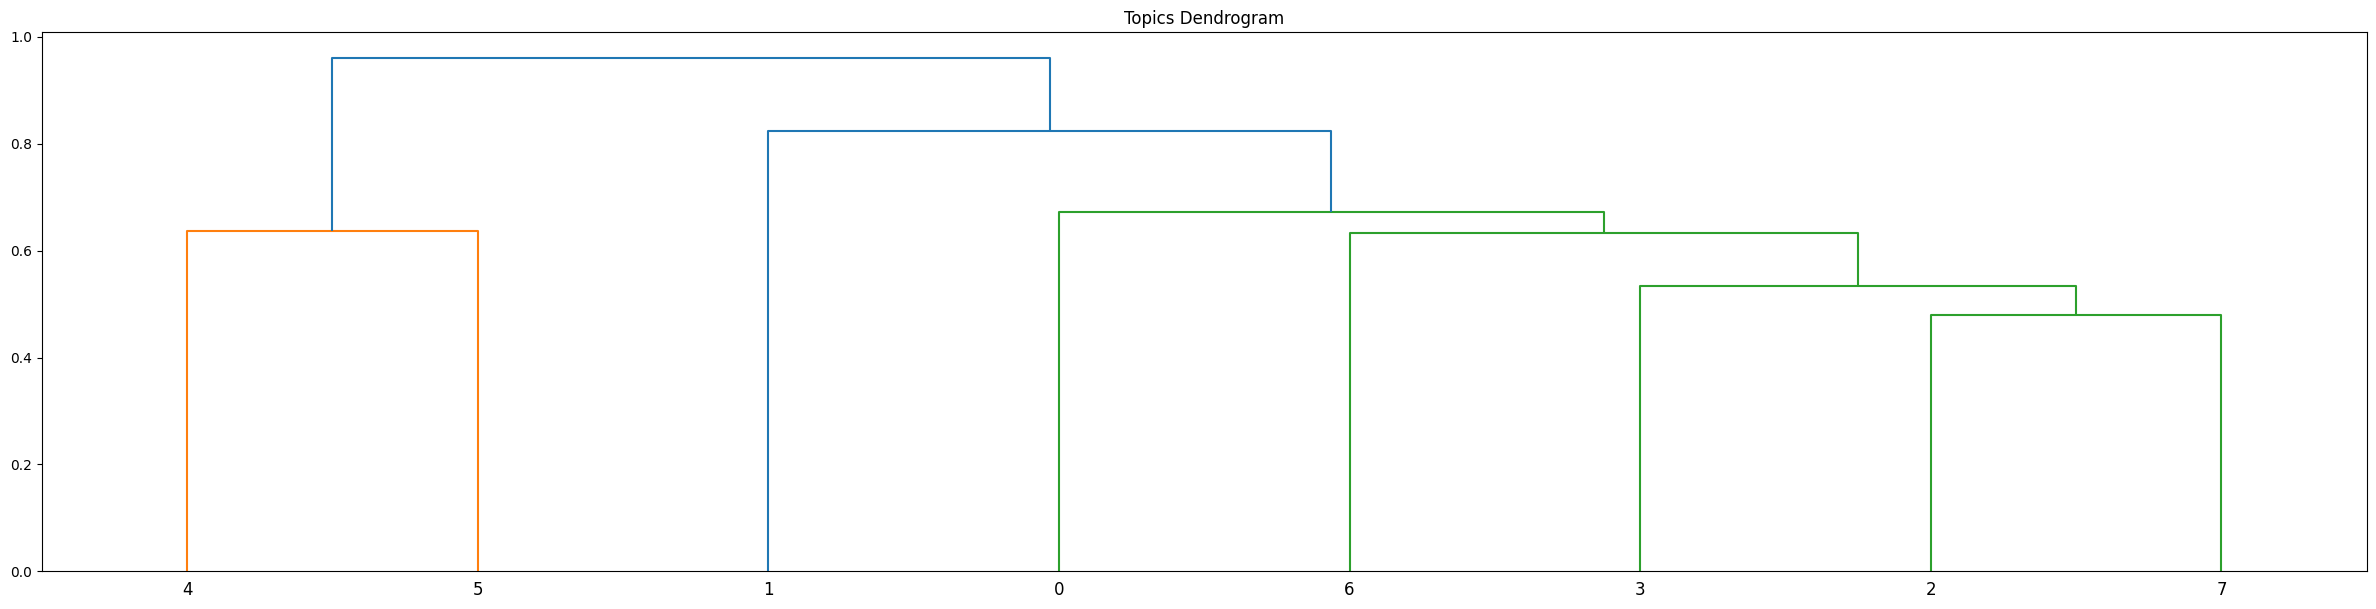

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

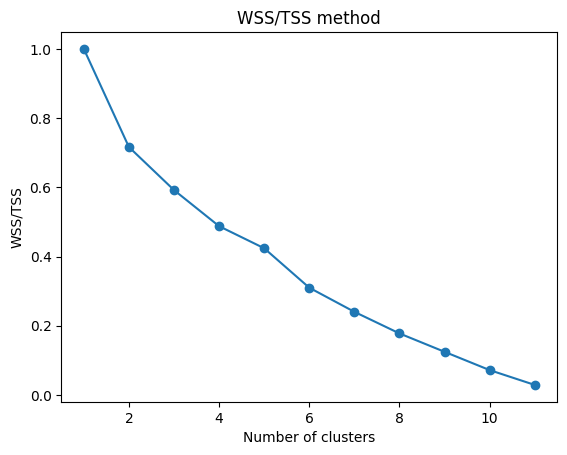

Dendrogram: 



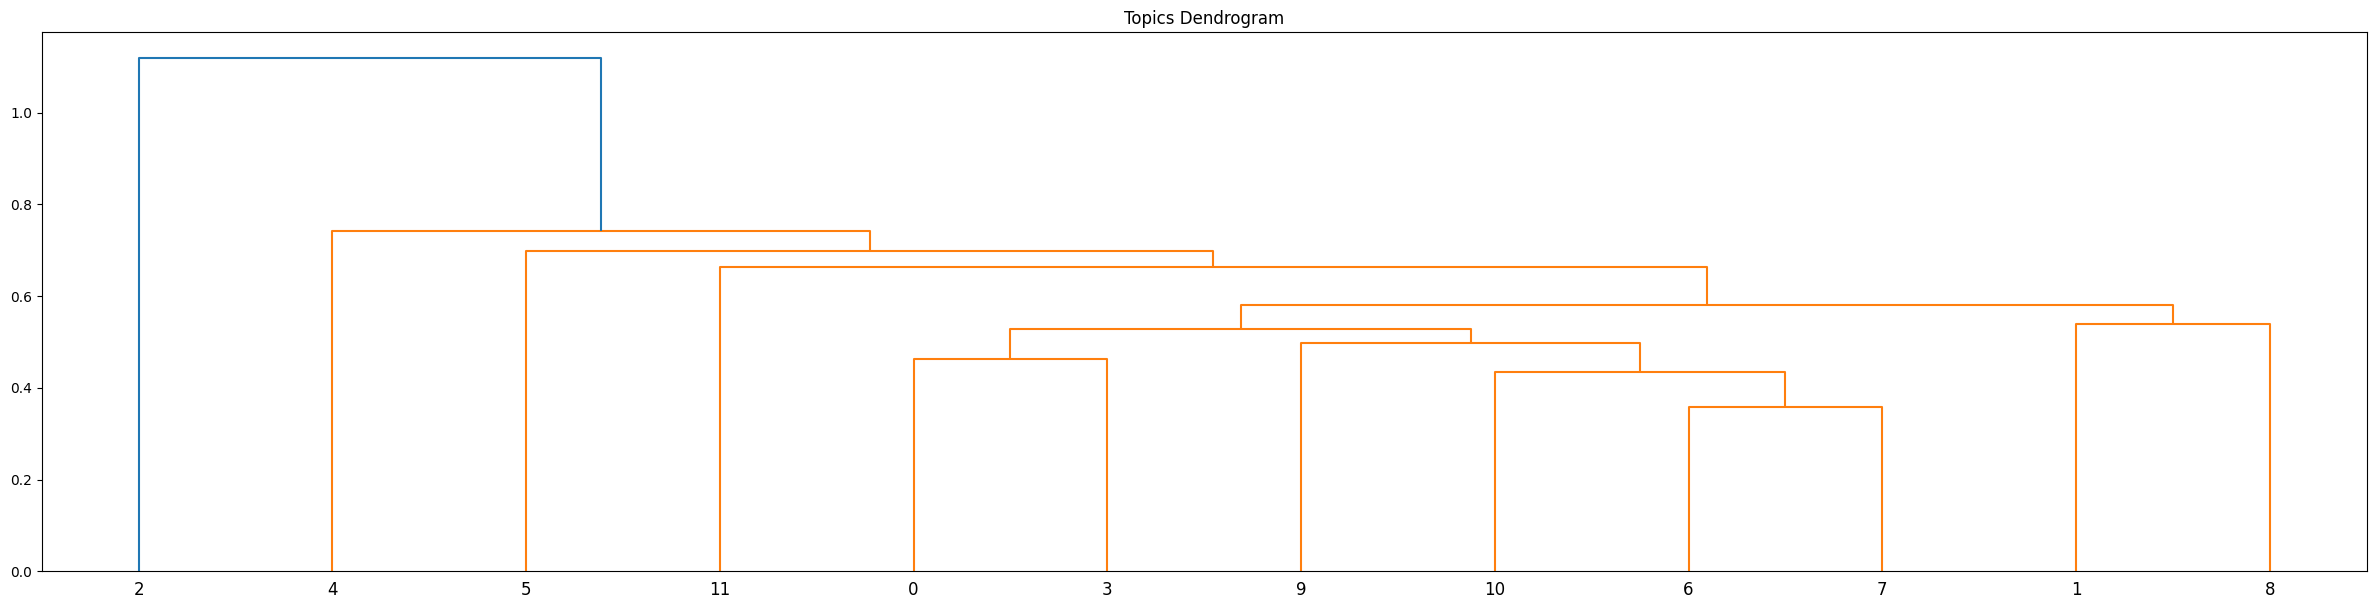

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

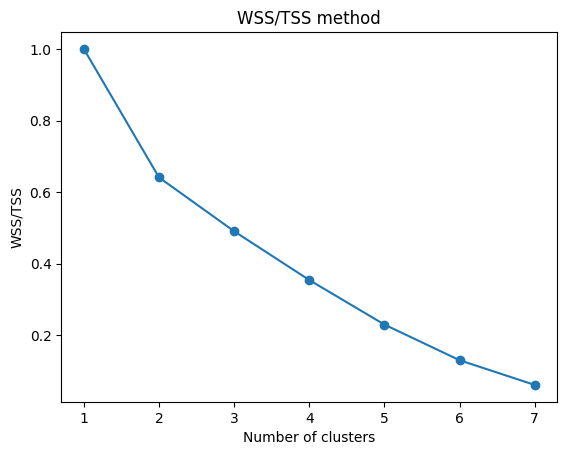

Dendrogram: 



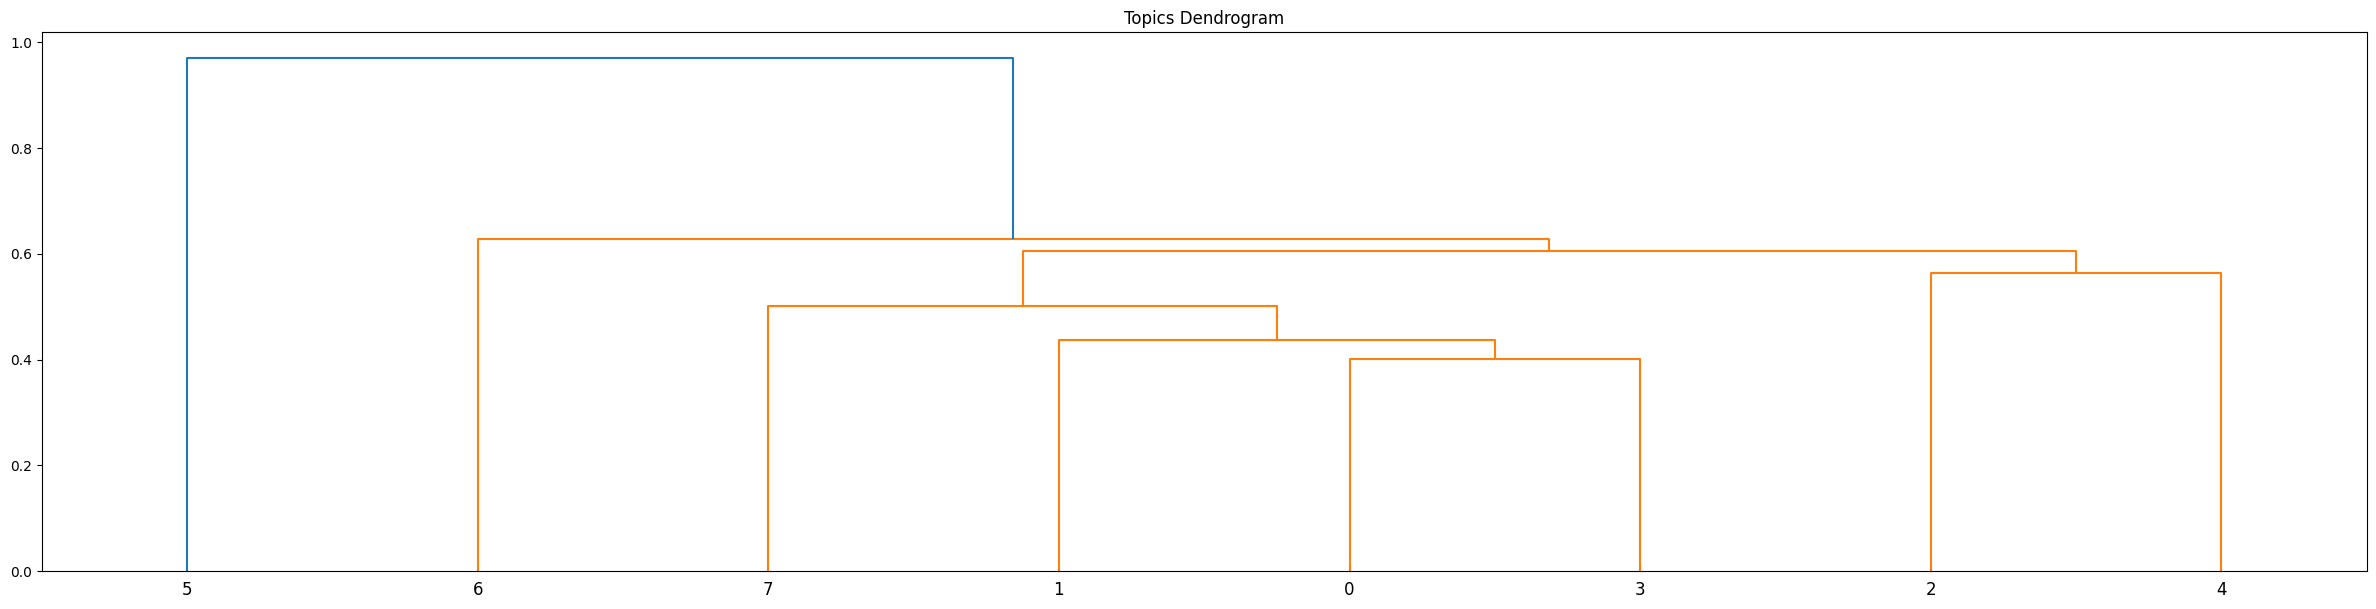

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

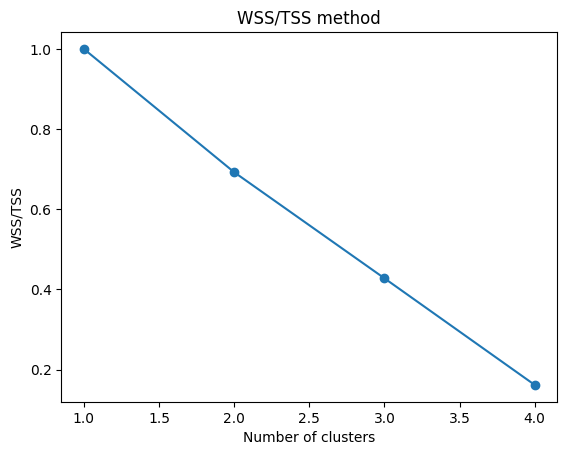

Dendrogram: 



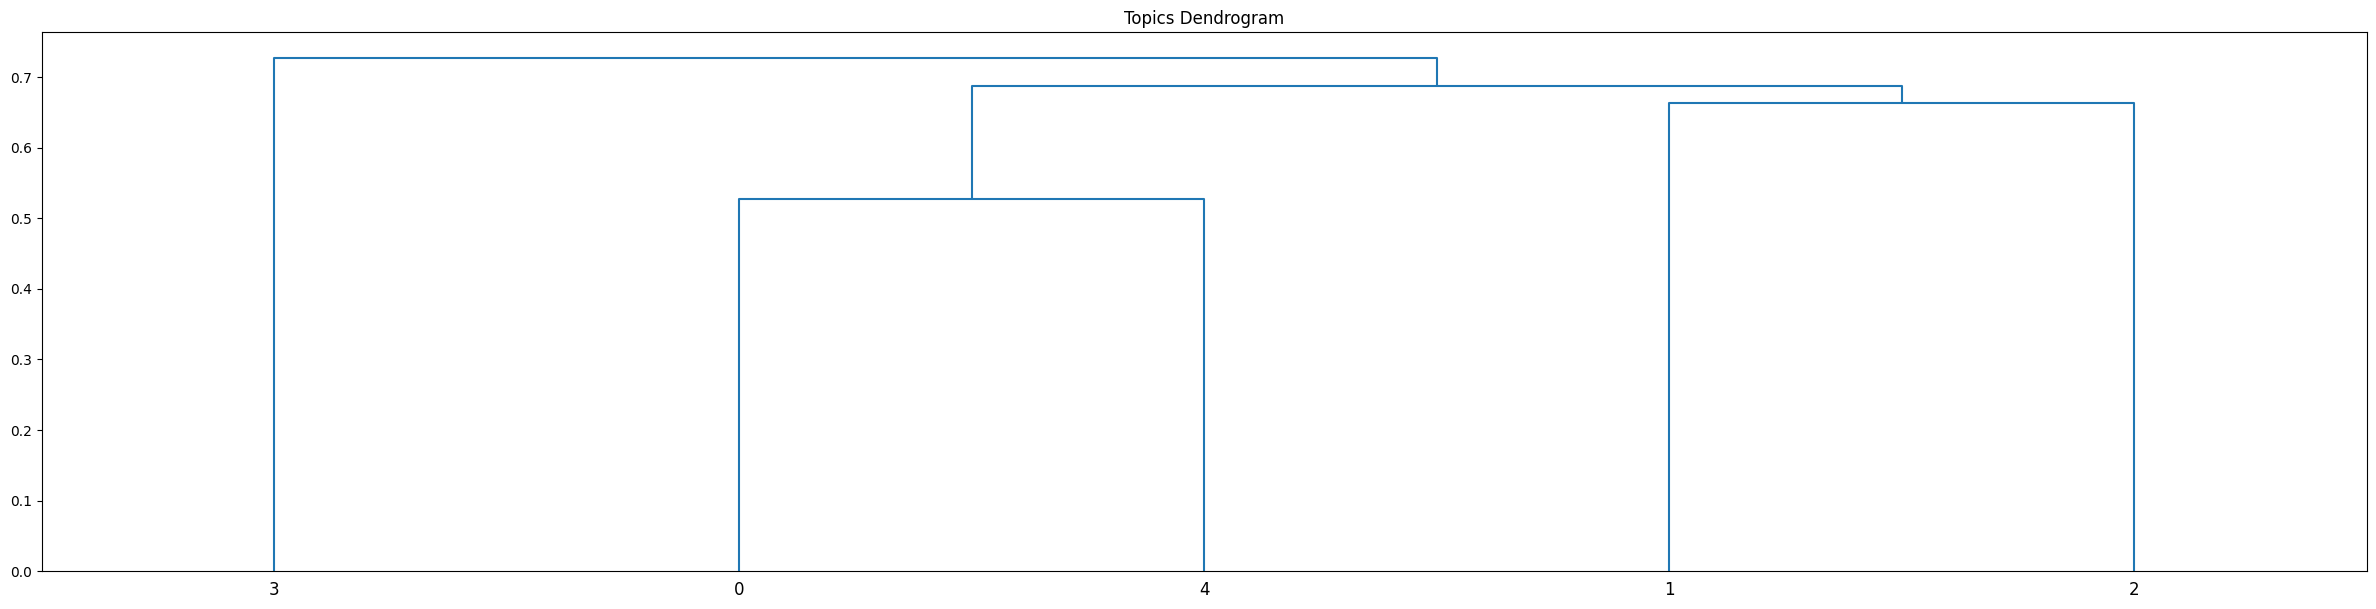

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

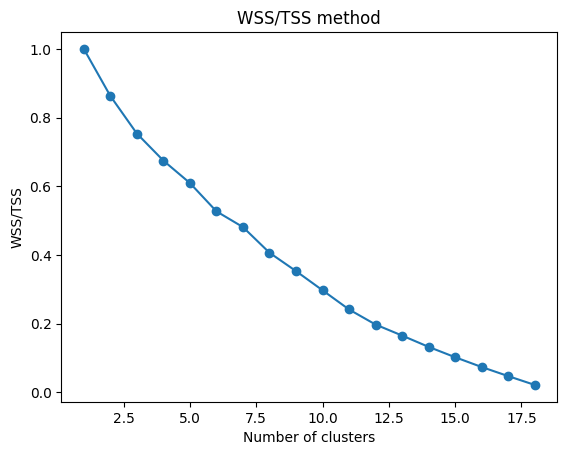

Dendrogram: 



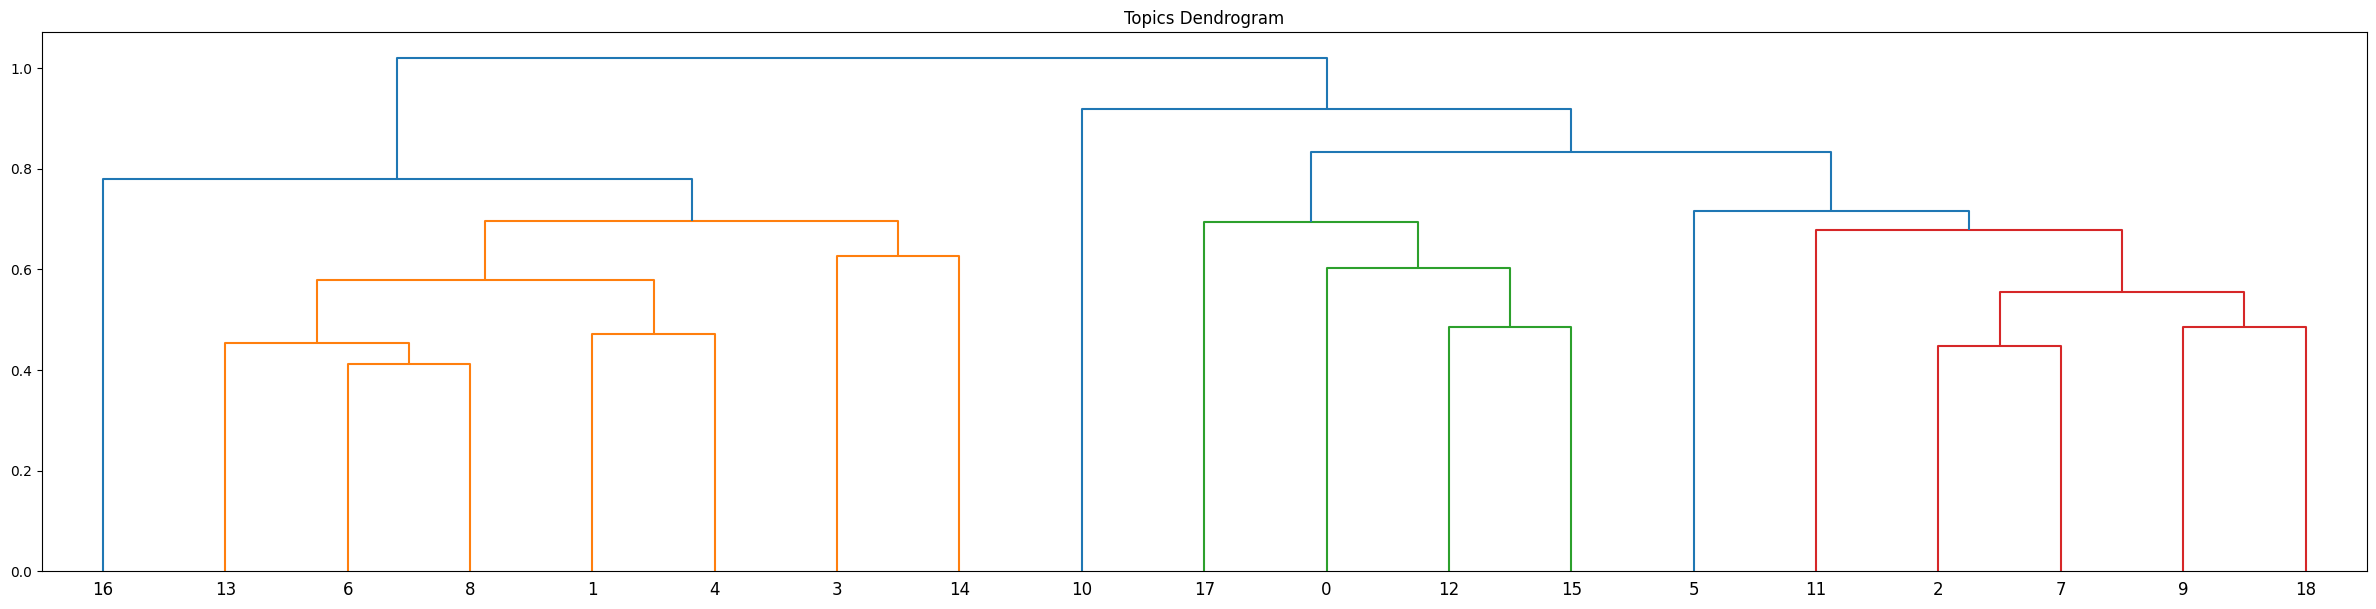

Less than two items in the topic
Less than two items in the topic
Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

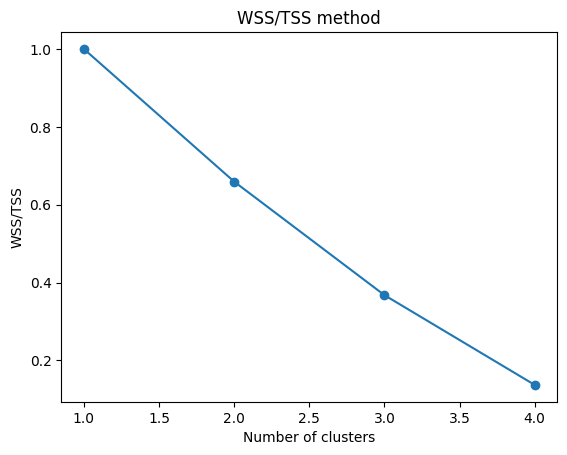

Dendrogram: 



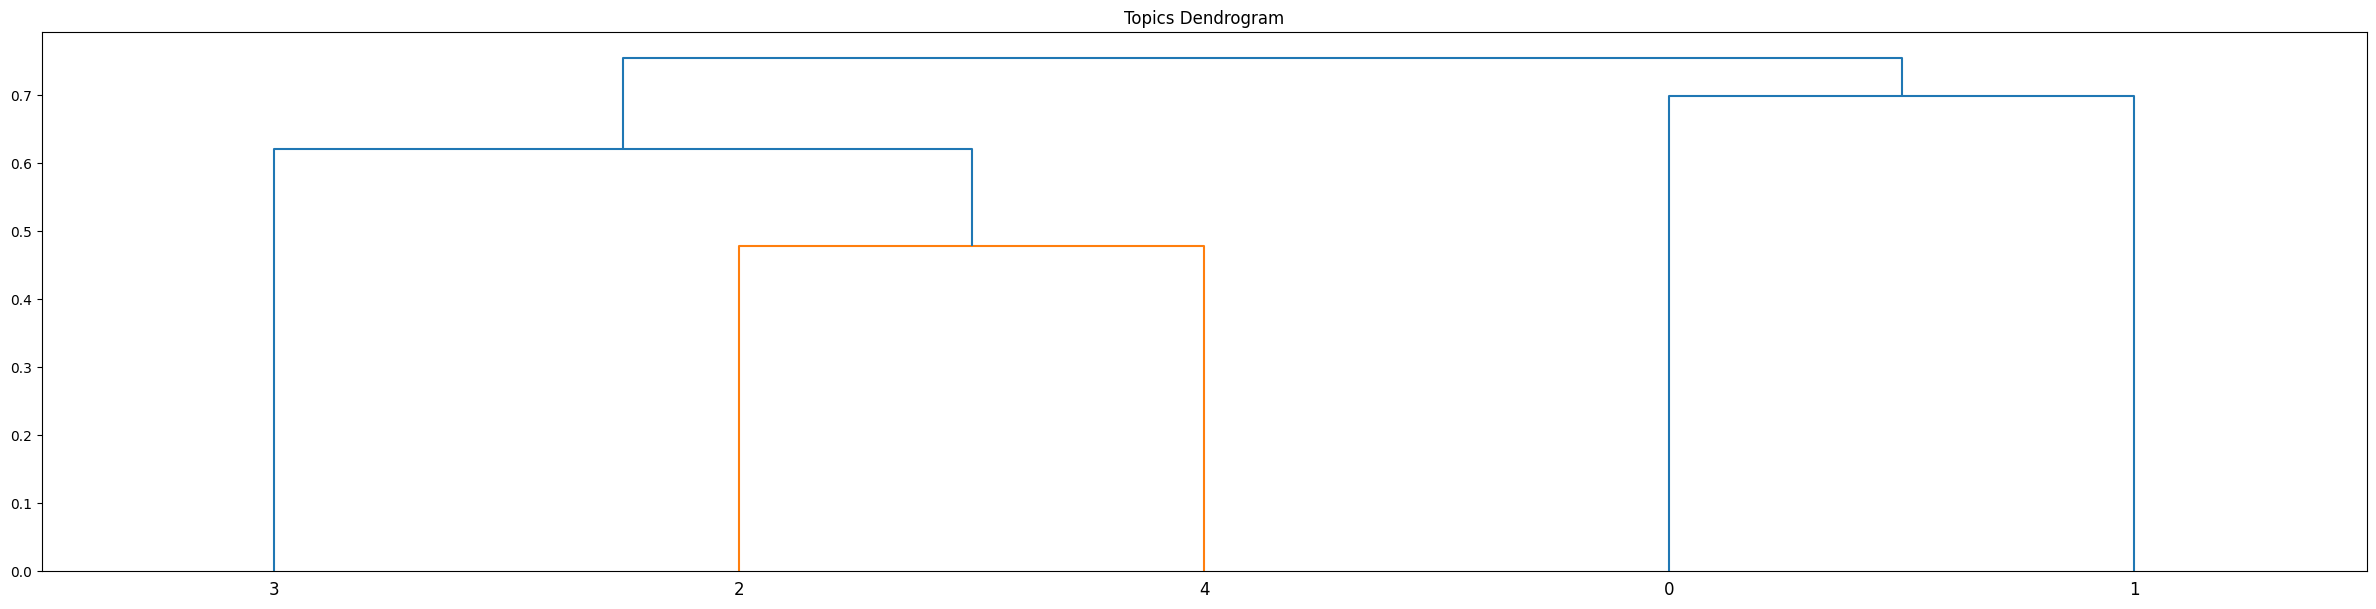

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

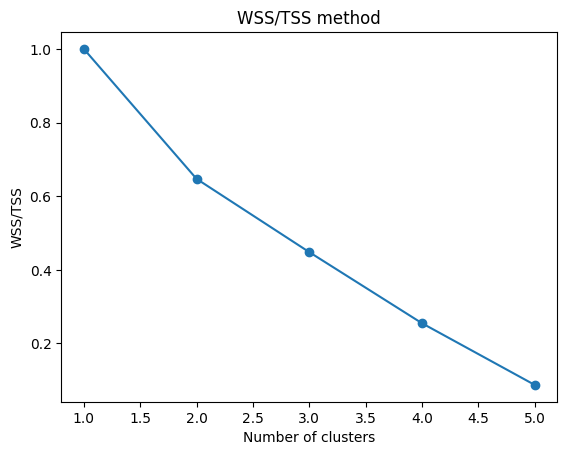

Dendrogram: 



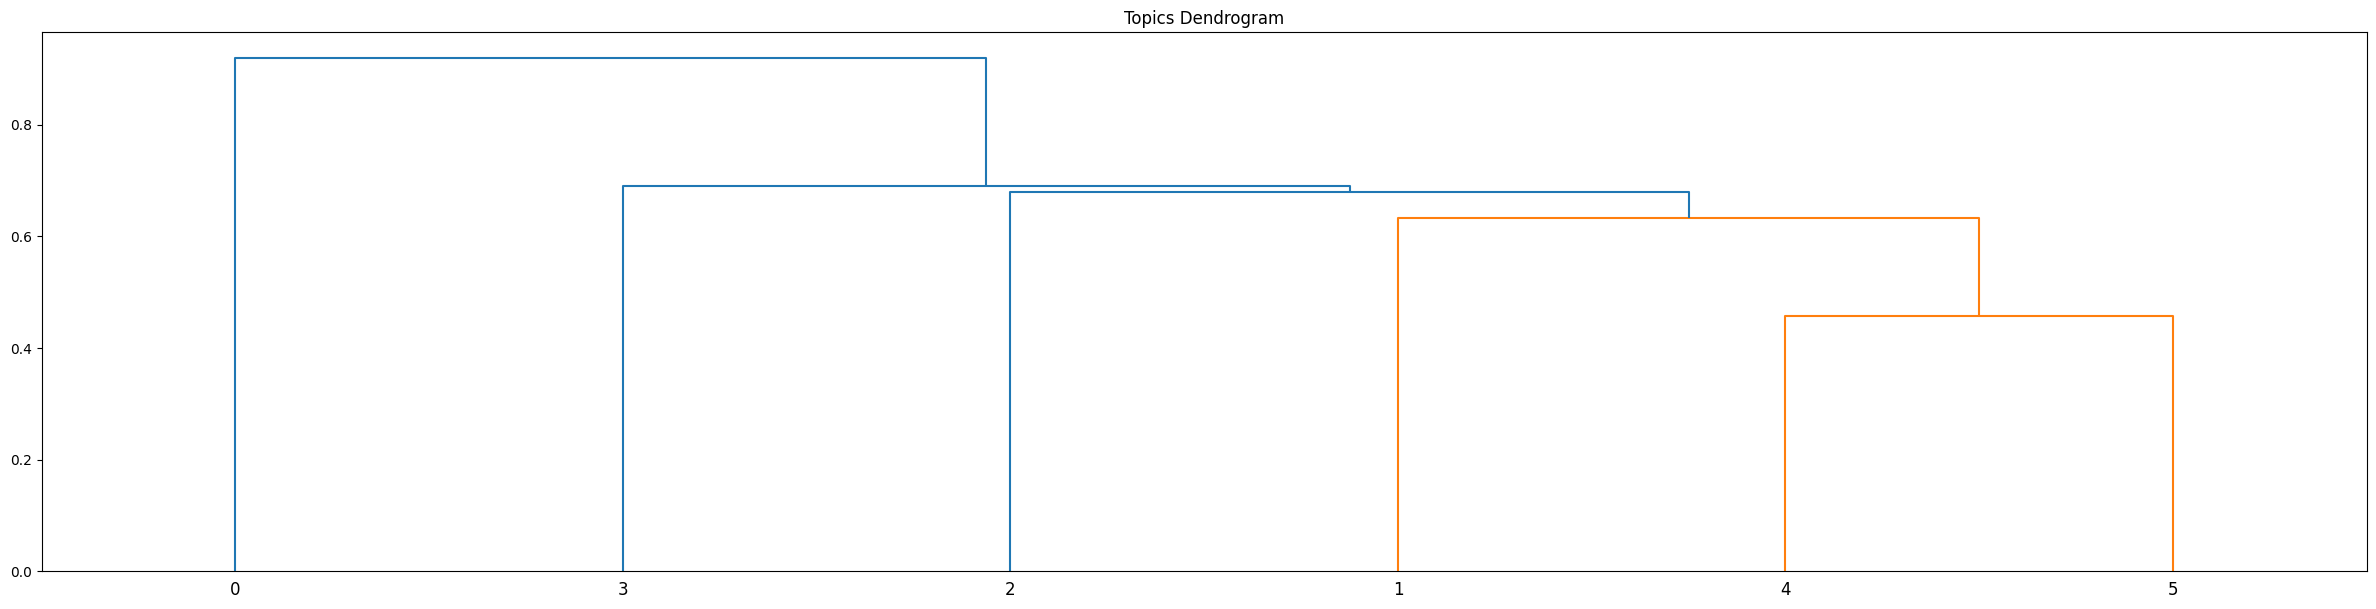

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

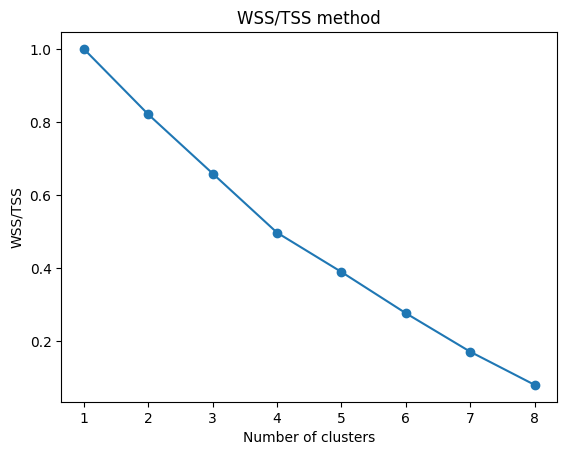

Dendrogram: 



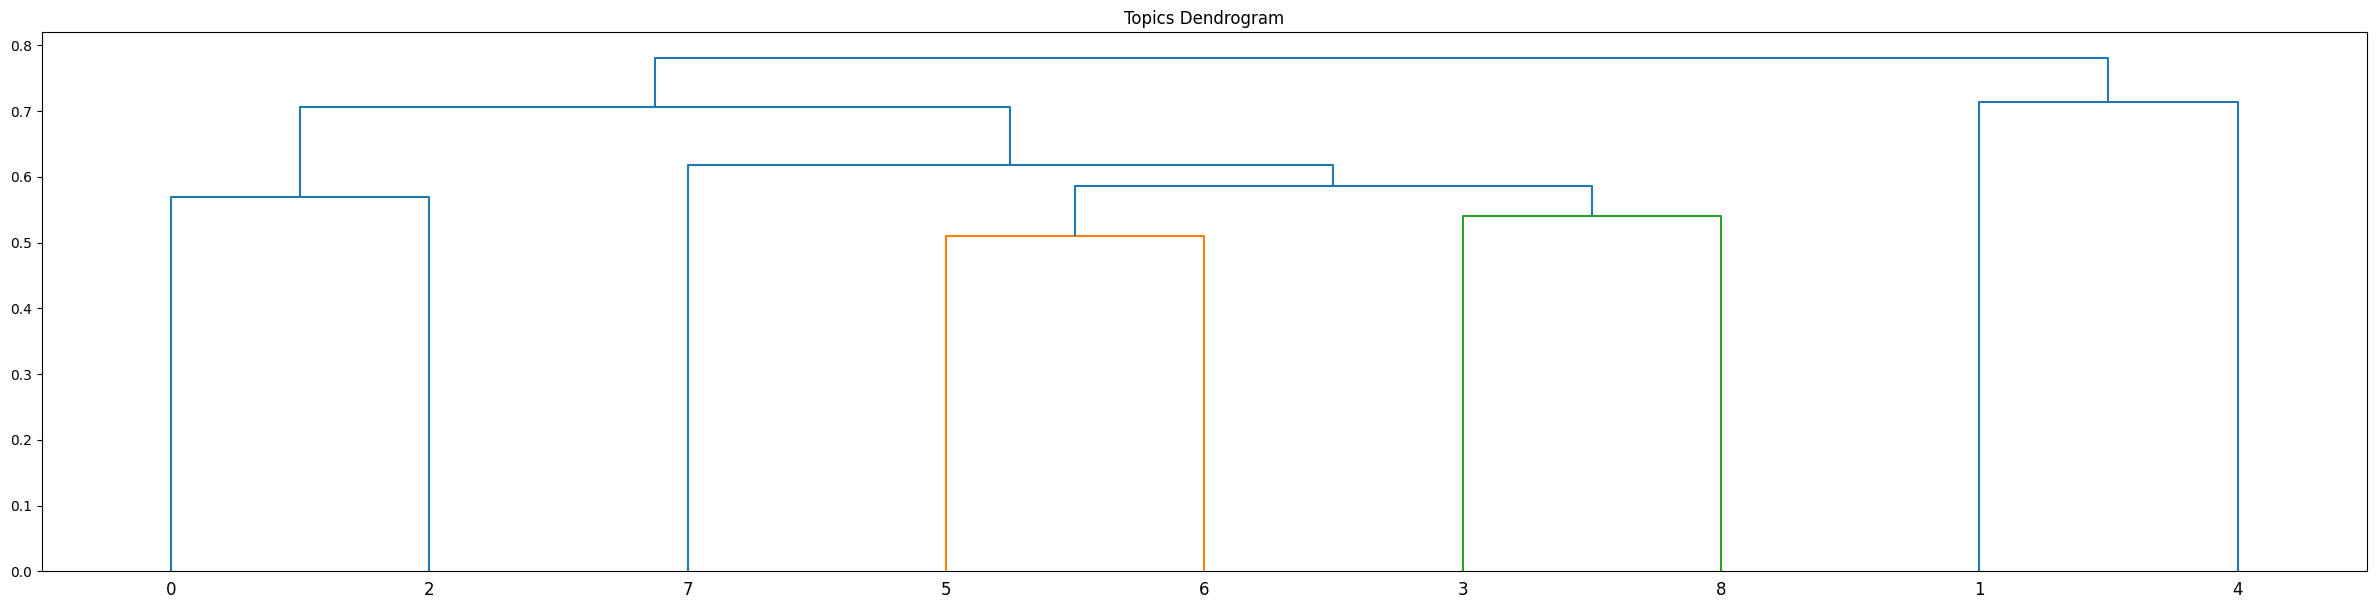

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

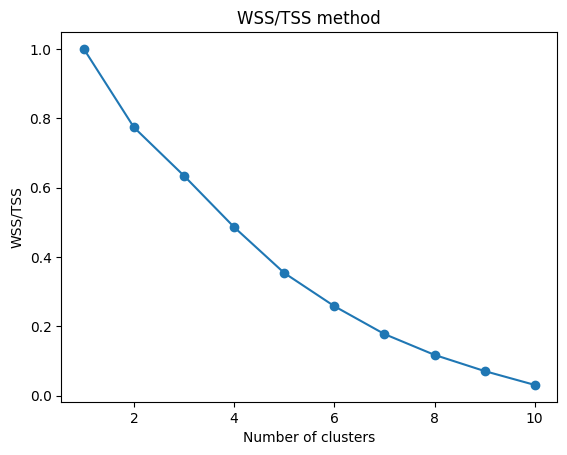

Dendrogram: 



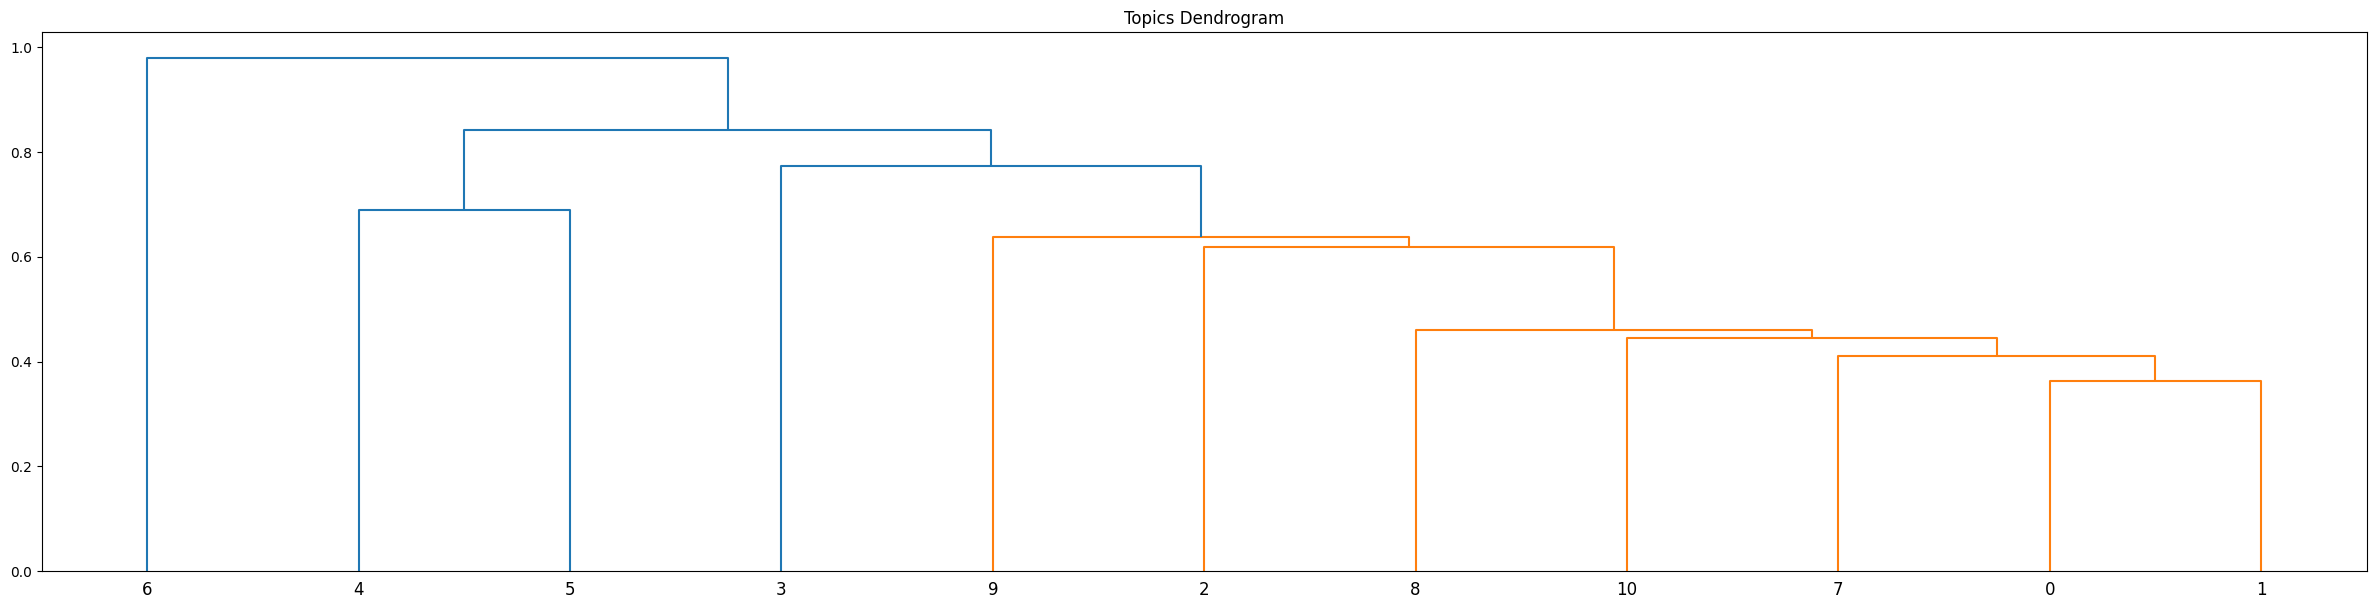

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

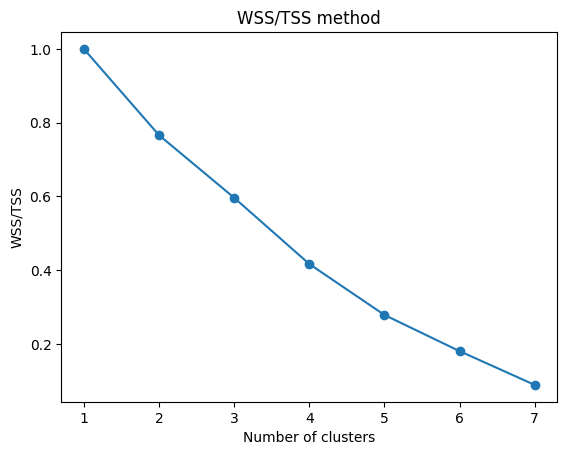

Dendrogram: 



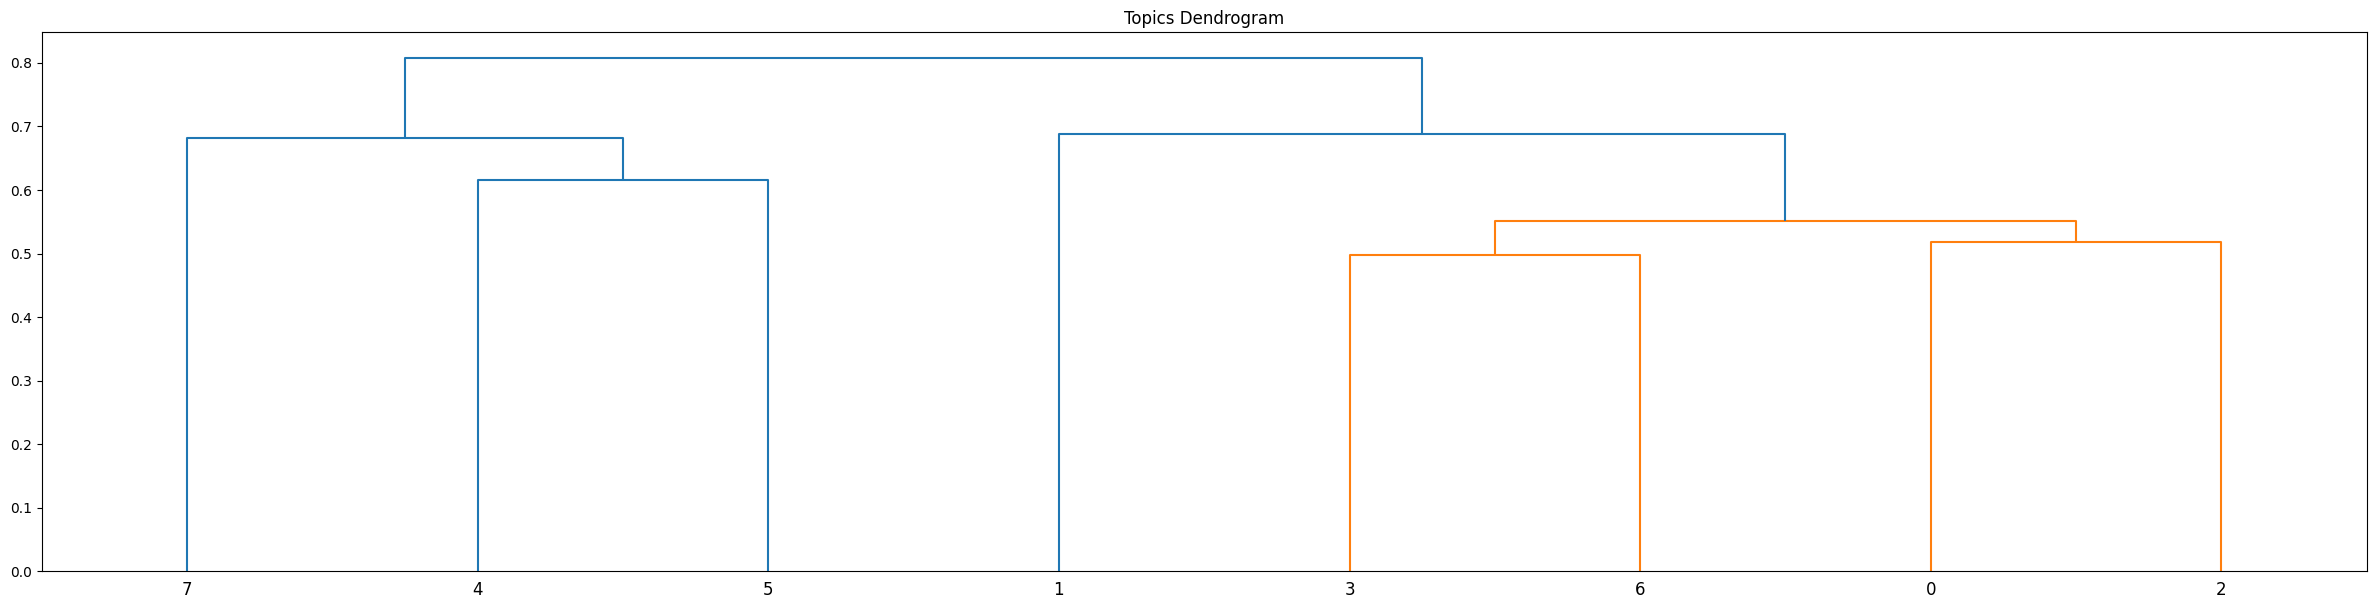

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

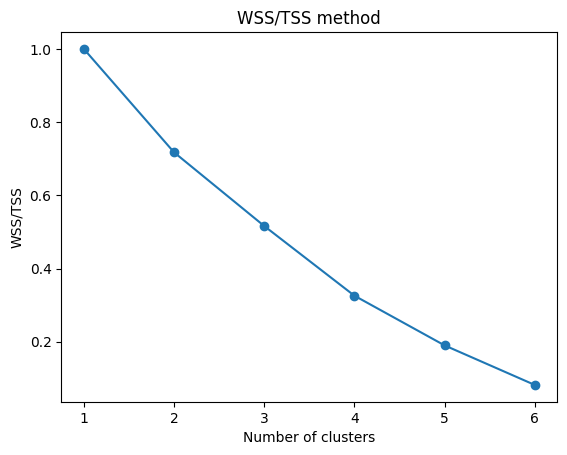

Dendrogram: 



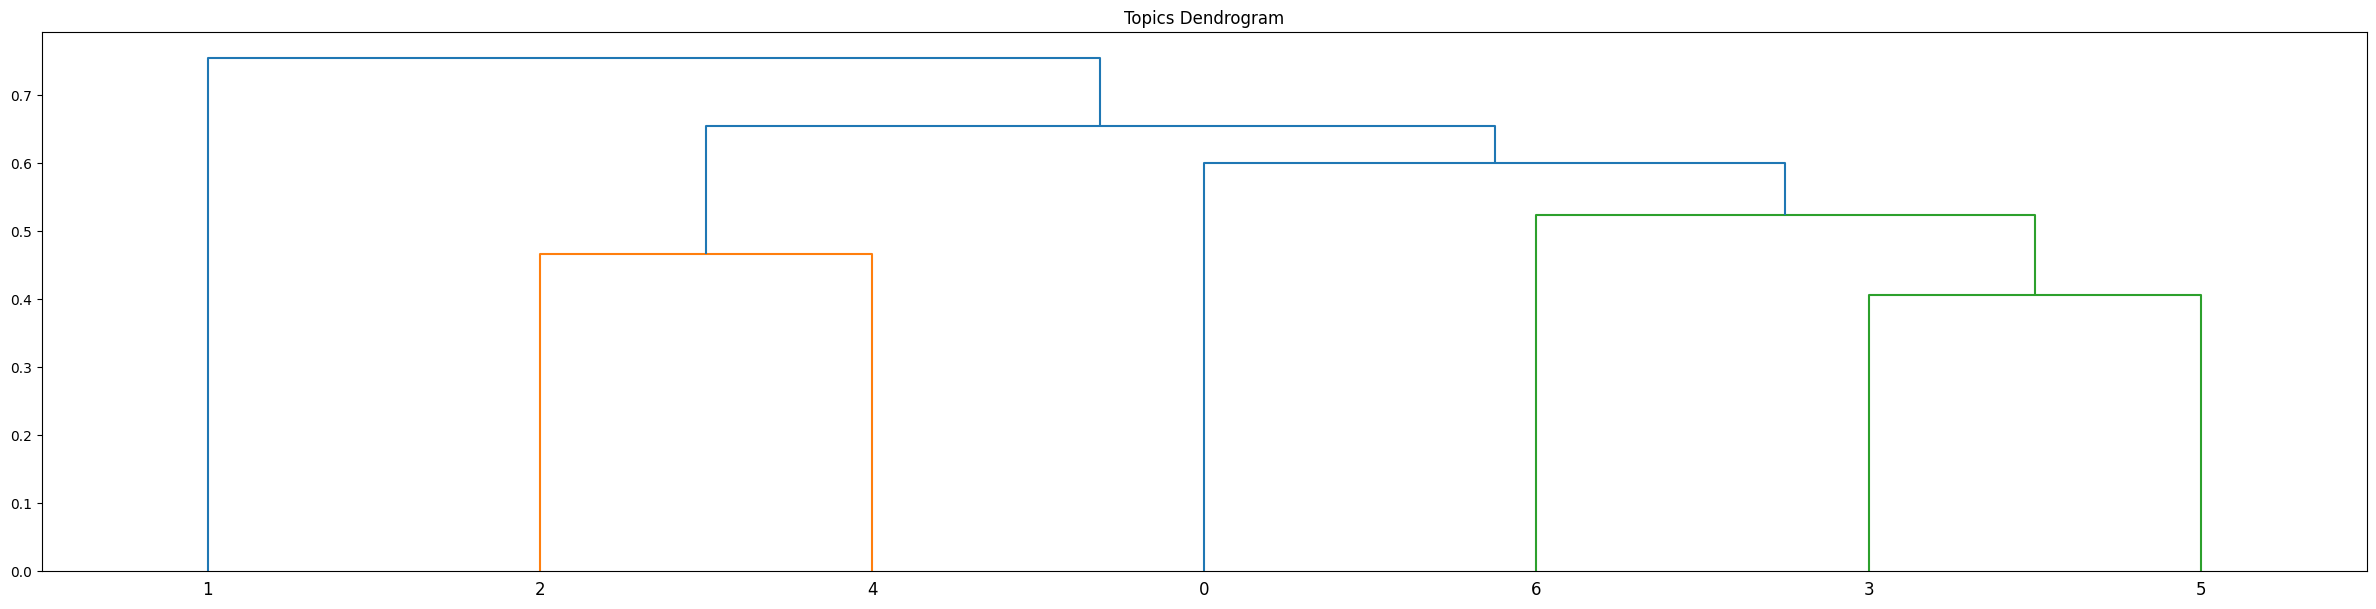

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

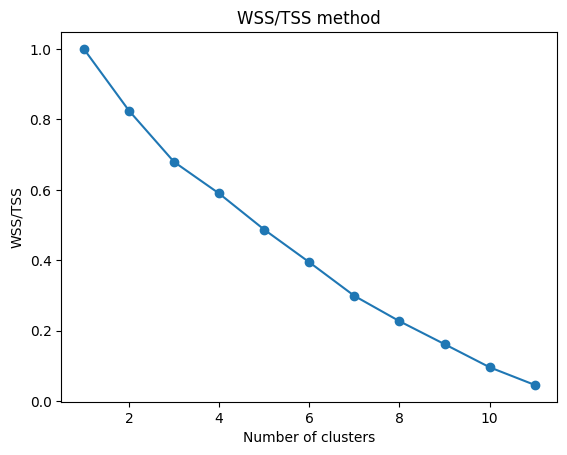

Dendrogram: 



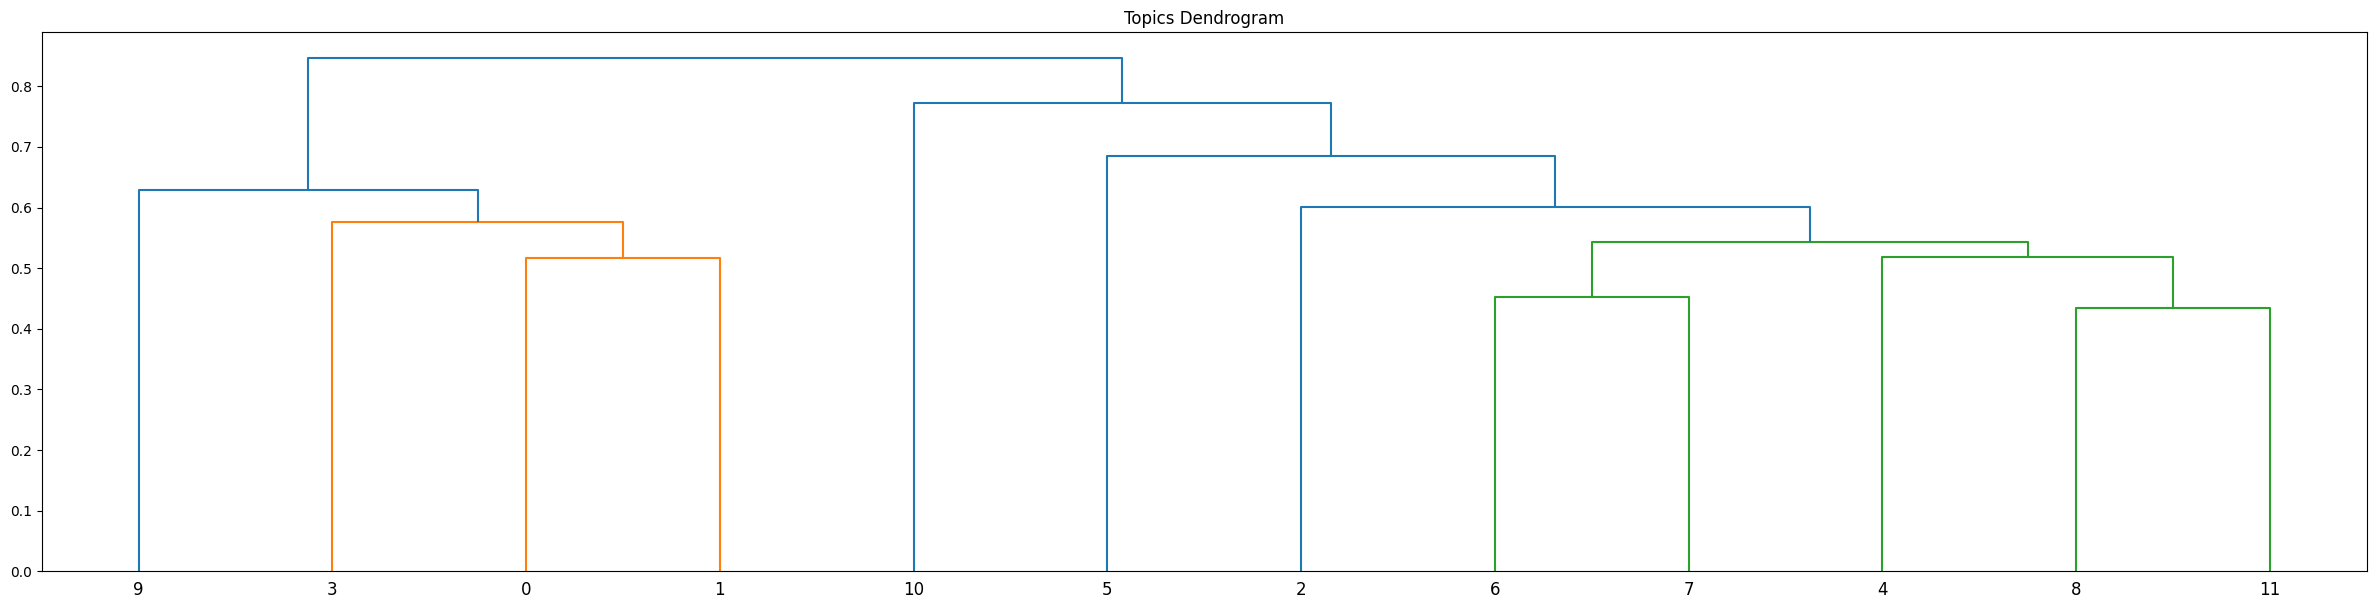

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Se

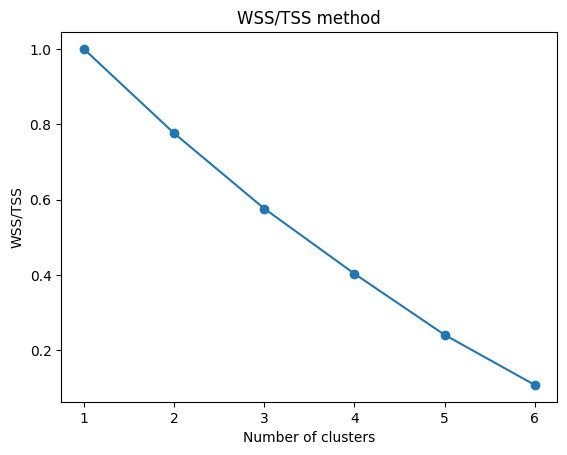

Dendrogram: 



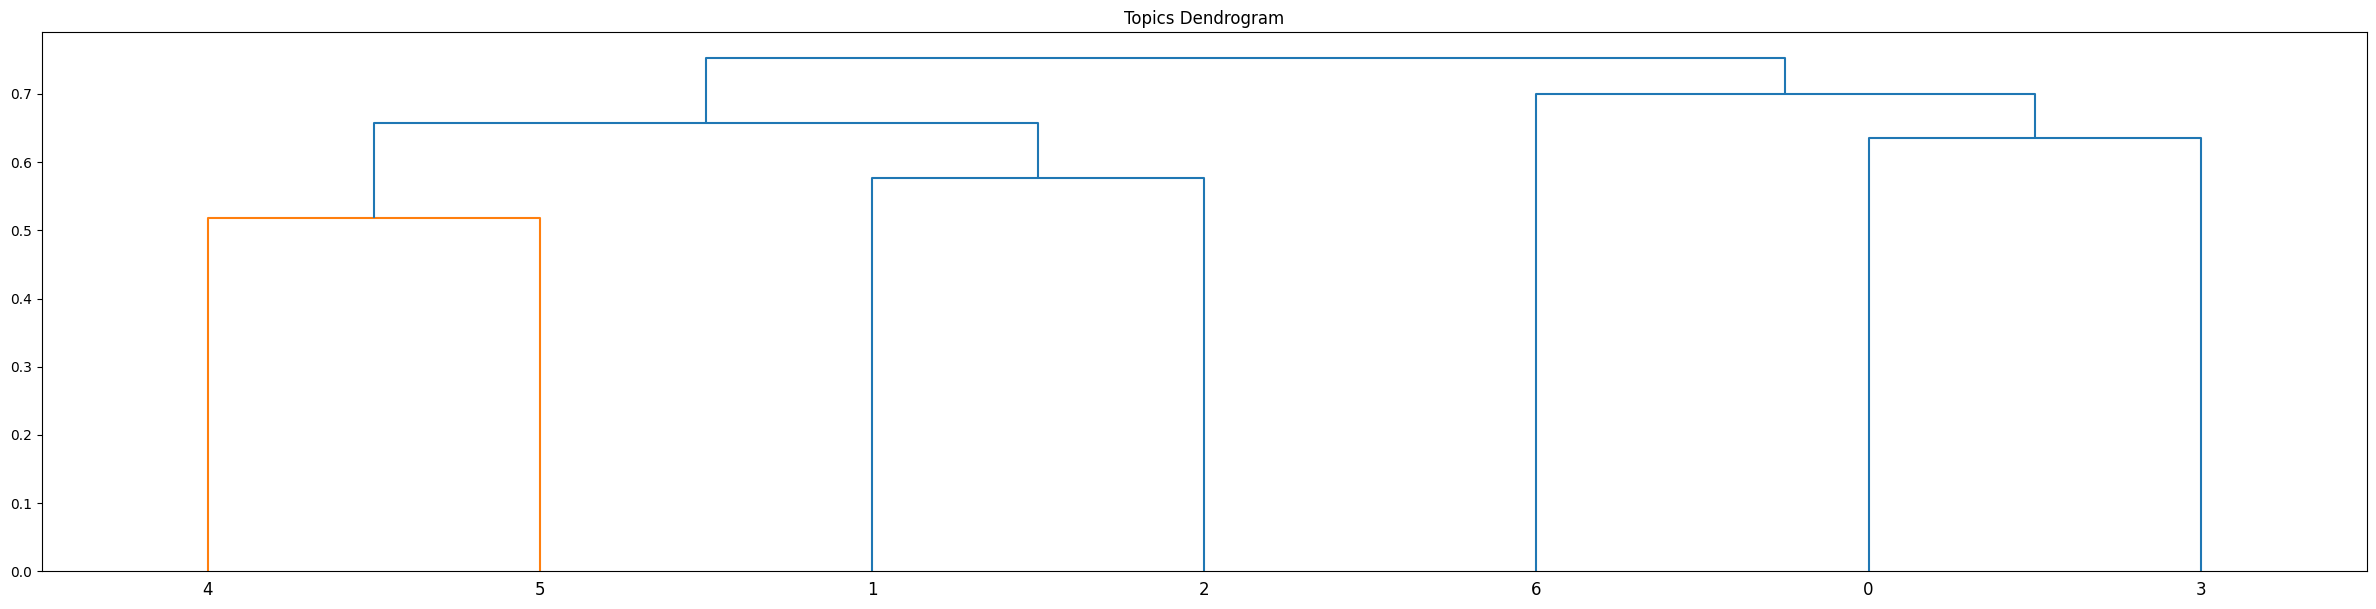

Cluster Analysis of Topic: 

Elbow Graph: 



c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


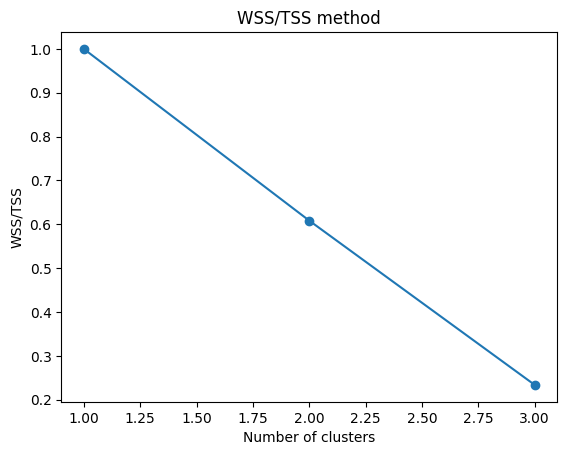

Dendrogram: 



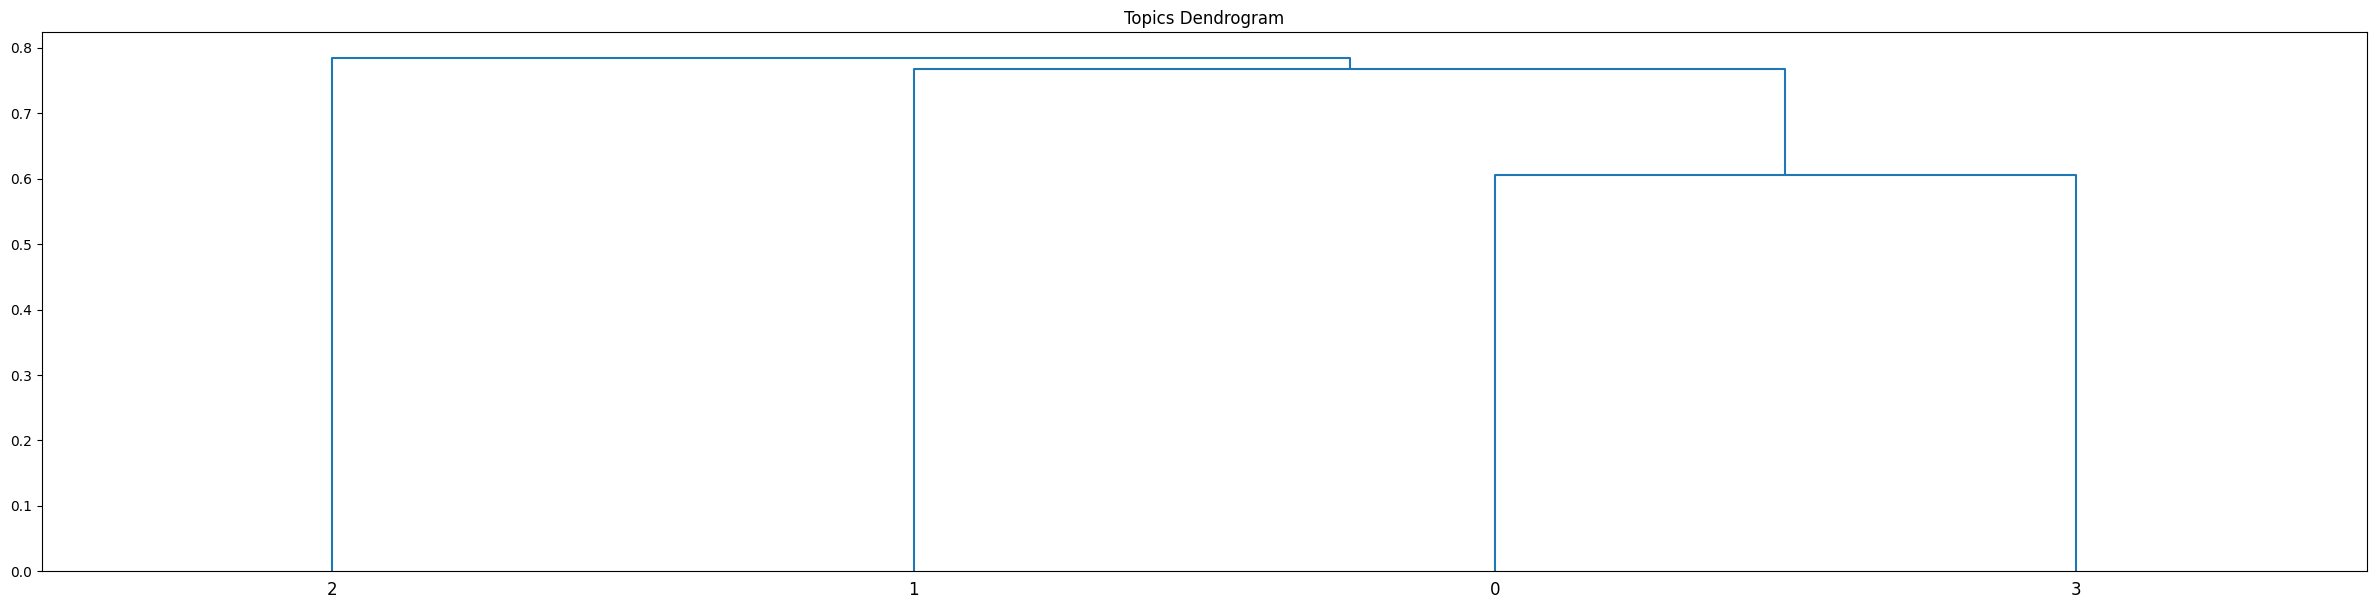

Empty DataFrame
Columns: []
Index: []

In [20]:
IndexedData.groupby('Topic').apply(lambda x: GraphAnalysis(x) if np.array(x).shape[0]>2 else print("Less than two items in the topic"))

## Clustering - Global

In [101]:
# Reminder of the data used
x = np.array(IndexedData.loc[:, IndexedData.columns != "Topic"])

Testing the results of k-means algo

In [123]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_3692\3836946445.py:7: UserWarning: The palette list has more values (5) than needed (3), which may not be intended.
  sns.scatterplot(


<Axes: xlabel='x', ylabel='y'>

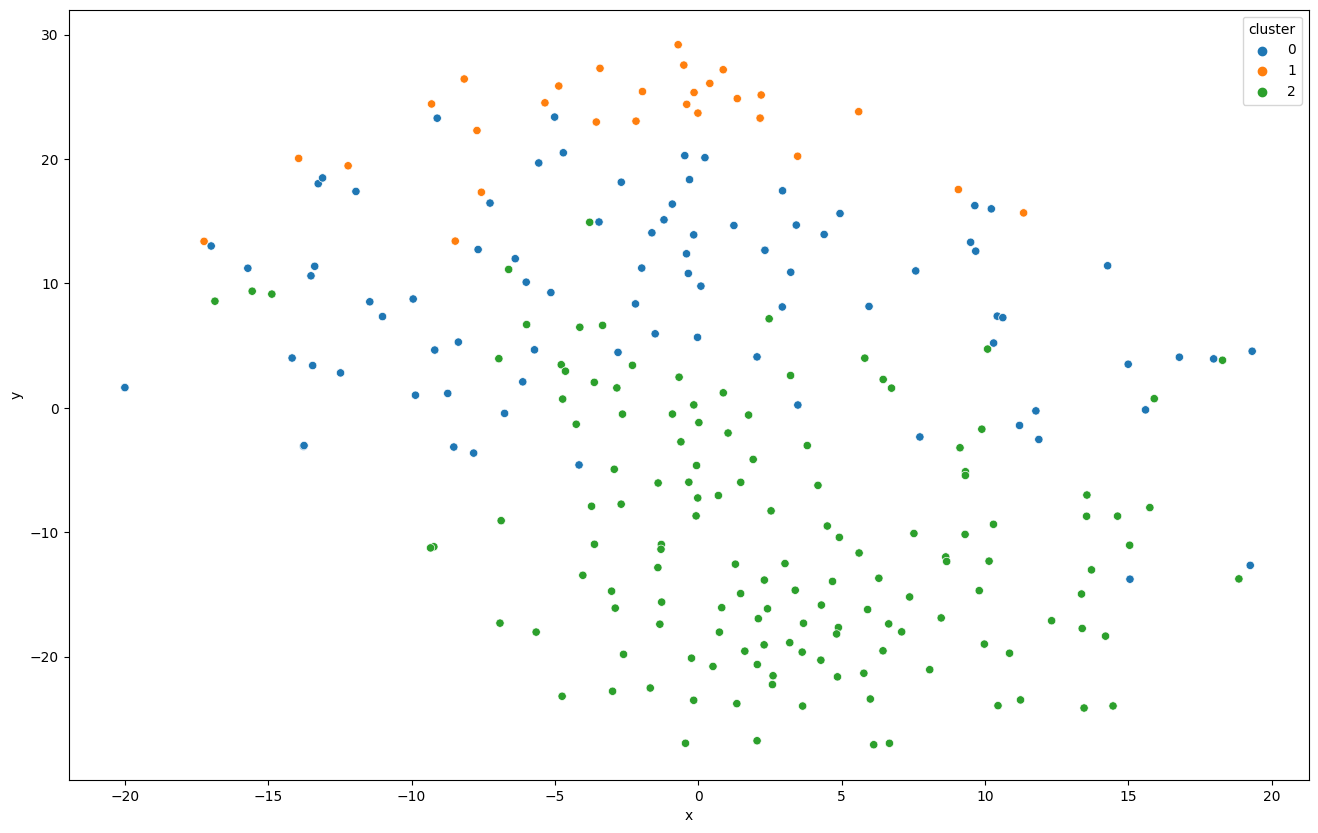

In [151]:
df = pd.DataFrame()
df["x"] = results[:,0]
df["y"] = results[:,1]
df["cluster"] = kmeans.labels_

plt.figure(figsize=(16,10))
sns.scatterplot(
    x="x", y="y",
    hue="cluster",
    palette=sns.color_palette("tab10", 5),
    data=df,
    legend="full",
    )

Results of hclusters

In [113]:
from sklearn.cluster import AgglomerativeClustering

In [114]:
df = pd.DataFrame()
# Hierachical clustering model
hc = AgglomerativeClustering(n_clusters = 5)
# Fit and predict on the data
y_hc = hc.fit_predict(x)
# Save the predictions as a column
df['y_hc']=y_hc

Results of GaussianMixture

In [110]:
from sklearn.mixture import GaussianMixture

In [111]:
# Fit the GMM model
gmm = GaussianMixture(n_components=5, n_init=5, random_state=42)
# Fit and predict on the data
y_gmm = gmm.fit_predict(x)
# Save the prediction as a column
df['y_gmm']=y_gmm

Results of DBSCAN

In [106]:
from sklearn.cluster import DBSCAN

In [107]:
# Fit the DBSCAN model
dbscan = DBSCAN(eps=0.8, min_samples=5) 
# Fit and predict on the data
y_dbscan = dbscan.fit_predict(x)
# Save the prediction as a column
df['y_dbscan'] = y_dbscan

In [109]:
df['y_dbscan']

0     -1
1     -1
2     -1
3     -1
4     -1
      ..
247   -1
248   -1
249   -1
250   -1
251   -1
Name: y_dbscan, Length: 252, dtype: int64

## Clustering - Topic by Topic

Clustering Functions

In [54]:
def KMeansClust(x, n):
    
    kmeans = KMeans(n_clusters=n)
    clusters = kmeans.fit_predict(x)

    return clusters

def HClust(x, n): 
    
    # Hierachical clustering model
    hc = AgglomerativeClustering(n_clusters = n)
    # Fit and predict on the data
    yHC = hc.fit_predict(x)
    
    return yHC


def GaussianClust(x, n):
    # Fit the GMM model
    gmm = GaussianMixture(n_components=n, n_init=5, random_state=42)
    # Fit and predict on the data
    yGMM = gmm.fit_predict(x)

    return yGMM

def DBSCANClust(x, n):
    # Fit the DBSCAN model
    dbscan = DBSCAN(eps=0.8, min_samples=5) 
    # Fit and predict on the data
    yDBSCAN = dbscan.fit_predict(x)

    return yDBSCAN

In [ ]:
KMeansClust(IndexedData.loc[:, IndexedData.columns != "Topic"], 5)

## Testing Topic Modelling

In [83]:
DirPpath = Path(os.path.abspath('')).parent # Fetching the current directory path - Specific for ipynb file - For .py: Path(os.path.dirname(os.path.realpath(__file__)).replace("\\", "/"))


testPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"  
test = pd.read_csv(testPath, index_col=0)

<>:4: DeprecationWarning: invalid escape sequence \P
<>:4: DeprecationWarning: invalid escape sequence \P
C:\Users\ecaudron001\AppData\Local\Temp\ipykernel_14808\1298132706.py:4: DeprecationWarning: invalid escape sequence \P
  testPath  = str(DirPpath.absolute()) + "\PreProcessedData.csv"


In [85]:
import nltk


tokens = [nltk.word_tokenize(i) for i in test["PreProcessedText"]]

In [86]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(tokens)
# Create Corpus
texts = tokens
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 2), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 3), (15, 1), (16, 1), (17, 1), (18, 1), (19, 2), (20, 1), (21, 1), (22, 1), (23, 5), (24, 2), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


In [87]:
import gensim
from pprint import pprint
# number of topics
num_topics = 26
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(25,
  '0.012*"tui" + 0.011*"transport" + 0.010*"public" + 0.009*"tourism" + '
  '0.009*"offer" + 0.008*"use" + 0.008*"tourist" + 0.008*"least" + '
  '0.007*"also" + 0.007*"train"'),
 (13,
  '0.033*"tourism" + 0.011*"development" + 0.011*"sustainable" + 0.008*"data" '
  '+ 0.008*"sustainability" + 0.008*"project" + 0.007*"plan" + 0.005*"city" + '
  '0.005*"dmo" + 0.005*"tourist"'),
 (7,
  '0.040*"tourism" + 0.010*"support" + 0.009*"sustainable" + '
  '0.008*"destination" + 0.007*"plan" + 0.007*"sector" + 0.007*"service" + '
  '0.007*"practice" + 0.006*"sustainability" + 0.006*"work"'),
 (6,
  '0.018*"tourism" + 0.011*"destination" + 0.011*"service" + '
  '0.007*"sustainable" + 0.007*"project" + 0.007*"marine" + 0.007*"data" + '
  '0.006*"increase" + 0.006*"green" + 0.006*"responsible"'),
 (15,
  '0.055*"tourism" + 0.017*"support" + 0.013*"sustainable" + 0.010*"sector" + '
  '0.009*"skill" + 0.008*"data" + 0.008*"project" + 0.008*"transition" + '
  '0.007*"develop" + 0.007*"product"'),

In [39]:
LDA = gensim.models.ldamodel.LdaModel

# Build LDA model
lda_model = LDA(corpus=corpus, id2word=id2word, num_topics=10, random_state=100,
                chunksize=200, passes=100)

In [35]:
dictionary = corpora.Dictionary(tokens)

In [38]:
from gensim.models.coherencemodel import CoherenceModel

coherence_model_lda = CoherenceModel(model=lda_model,
texts=tokens, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.27854959111871413


Optimal number of topics

In [67]:
results = []

for t in range(2, 100):
    lda_model = LDA(corpus=corpus, id2word=id2word, num_topics=t, random_state=100,
                chunksize=200, passes=100)
    corpus_lda = lda_model[corpus]

    cm = CoherenceModel(model=lda_model, corpus=corpus_lda, coherence='u_mass')
    score = cm.get_coherence()
    tup = t, score
    results.append(tup)

results = pd.DataFrame(results, columns=['topic', 'score'])

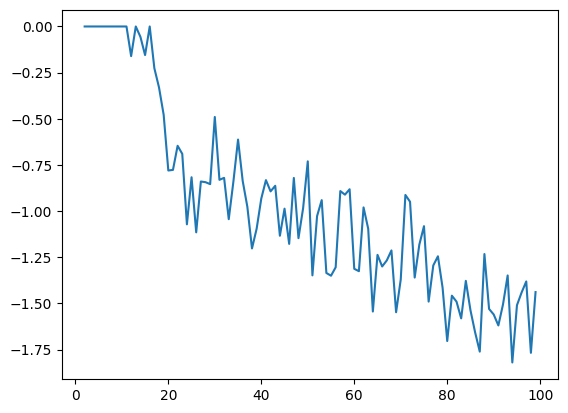

In [68]:
s = pd.Series(results.score.values, index=results.topic.values)
_ = s.plot()

In [64]:
topic = []

for j in range(0, len(corpus)):

    max = 0
    for i in range(0, len(lda_model[corpus[j]])):

        if lda_model[corpus[j]][i][1] > max:

            max = lda_model[corpus[j]][i][1]
            MaxTop = lda_model[corpus[j]][i][0]

    topic.append(MaxTop)

In [93]:
import gensim
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics, random_state=100,
                chunksize=200, passes=100)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.039*"tourism" + 0.018*"sustainable" + 0.013*"data" + 0.010*"work" + '
  '0.009*"support" + 0.009*"eu" + 0.009*"project" + 0.009*"science" + '
  '0.009*"solution" + 0.008*"service"'),
 (1,
  '0.023*"sustainability" + 0.012*"accommodation" + 0.012*"tui" + '
  '0.010*"sustainable" + 0.010*"tourism" + 0.009*"travel" + 0.008*"develop" + '
  '0.007*"goal" + 0.007*"certification" + 0.007*"least"'),
 (2,
  '0.042*"tourism" + 0.014*"destination" + 0.011*"project" + '
  '0.010*"sustainable" + 0.007*"european" + 0.007*"development" + '
  '0.007*"support" + 0.006*"digital" + 0.006*"level" + 0.006*"sector"'),
 (3,
  '0.033*"tourism" + 0.014*"destination" + 0.011*"city" + 0.009*"development" '
  '+ 0.009*"system" + 0.009*"tourist" + 0.008*"measure" + 0.007*"zagreb" + '
  '0.007*"traffic" + 0.007*"share"'),
 (4,
  '0.041*"tourism" + 0.012*"strategy" + 0.008*"sustainable" + '
  '0.007*"development" + 0.007*"data" + 0.007*"sector" + 0.007*"work" + '
  '0.007*"develop" + 0.006*"sustainability"

In [96]:
import pyLDAvis.gensim
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()
panel = pyLDAvis.gensim.prepare(topic_model = lda_model, corpus = corpus, dictionary = id2word, mds = "tsne")
panel

c:\Users\ecaudron001\Documents\GitHub\semic_pledges\.venv\lib\site-packages\pyLDAvis\_prepare.py:228: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info  = pd.DataFrame({'saliency': saliency, 'Term': vocab, \


ValueError: perplexity must be less than n_samples